In [1]:
pip install amazon-product-review-scraper

Note: you may need to restart the kernel to use updated packages.


In [1]:
from amazon_product_review_scraper import amazon_product_review_scraper
review_scraper = amazon_product_review_scraper(amazon_site="amazon.in", product_asin="B07GXQQP2Z")
amazon_data = review_scraper.scrape()
amazon_data.head(5)

Total reviews (all pages): 589
Total pages: 59
Start page: 1; End page: 59

Started!



Completed!


date_info             name  \
0       Reviewed in India on 1 March 2019      SonamGupta    
1  Reviewed in India on 29 September 2019     Sumit Saxena   
2   Reviewed in India on 22 February 2019     Ankit Mishra   
3       Reviewed in India on 23 July 2019     Tushar Arora   
4       Reviewed in India on 4 April 2019  Amazon Customer   

                                    title  \
0         MUST BUY ..... INALASA AIRFRYER   
1  Low Quality/ Pathetic Customer Support   
2                             Easy to use   
3              Was almost a great product   
4       Product has manufacturing defect.   

                                             content              rating  
0  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...  5.0 out of 5 stars  
1  Earlier I gave a positive review, but after us...  1.0 out of 5 stars  
2  Inalsa Air Fryer...this is awesome product ......  5.0 out of 5 stars  
3  I bought this in the prime day sale on 15th Ju...  2.0 out of 5 stars  
4  Product has manufacturing defect as the right ...  1.0 out of 5 stars

In [2]:
import pandas as pd
# Change name of Dataframe 
Amazon_reviews = pd.DataFrame(amazon_data)
Amazon_reviews

date_info               name  \
0         Reviewed in India on 1 March 2019        SonamGupta    
1    Reviewed in India on 29 September 2019       Sumit Saxena   
2     Reviewed in India on 22 February 2019       Ankit Mishra   
3         Reviewed in India on 23 July 2019       Tushar Arora   
4         Reviewed in India on 4 April 2019    Amazon Customer   
..                                      ...                ...   
584         Reviewed in India on 5 May 2019  Regular Customer    
585   Reviewed in India on 13 December 2020               NIKI   
586       Reviewed in India on 8 April 2021    Satendra Sharma   
587       Reviewed in India on 8 April 2021               SidB   
588       Reviewed in India on 6 March 2021      Shelender Sud   

                                      title  \
0           MUST BUY ..... INALASA AIRFRYER   
1    Low Quality/ Pathetic Customer Support   
2                               Easy to use   
3                Was almost a great product   
4         Product has manufacturing defect.   
..                                      ...   
584     It’s available on Flipkart for 3998   
585                          waste of money   
586                        Worth to buy!!!!   
587            It has gone dead in 8 months   
588                                      Ok   

                                               content              rating  
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...  5.0 out of 5 stars  
1    Earlier I gave a positive review, but after us...  1.0 out of 5 stars  
2    Inalsa Air Fryer...this is awesome product ......  5.0 out of 5 stars  
3    I bought this in the prime day sale on 15th Ju...  2.0 out of 5 stars  
4    Product has manufacturing defect as the right ...  1.0 out of 5 stars  
..                                                 ...                 ...  
584  It’s available on Flipkart for 3998 it’s a goo...  5.0 out of 5 stars  
585  Hate to say I order two for my sister to gift ...  1.0 out of 5 stars  
586                                          Awesome 👌  4.0 out of 5 stars  
587      The product has stopped working in 8 months .  2.0 out of 5 stars  
588                                              So so  4.0 out of 5 stars  

[589 rows x 5 columns]

In [3]:
Amazon_reviews= Amazon_reviews.drop(["date_info","name","title","rating"],axis=1)
Amazon_reviews.head(5)

content
0  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...
1  Earlier I gave a positive review, but after us...
2  Inalsa Air Fryer...this is awesome product ......
3  I bought this in the prime day sale on 15th Ju...
4  Product has manufacturing defect as the right ...

In [4]:
Amazon_reviews=Amazon_reviews.rename(columns = {"content": "Reviews"})
Amazon_reviews

Reviews
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...
1    Earlier I gave a positive review, but after us...
2    Inalsa Air Fryer...this is awesome product ......
3    I bought this in the prime day sale on 15th Ju...
4    Product has manufacturing defect as the right ...
..                                                 ...
584  It’s available on Flipkart for 3998 it’s a goo...
585  Hate to say I order two for my sister to gift ...
586                                          Awesome 👌
587      The product has stopped working in 8 months .
588                                              So so

[589 rows x 1 columns]

In [5]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mypc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, it, that, etc.

In [7]:
import string   
import re

def clean_text(text):
    wnl=WordNetLemmatizer()
    

    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] ##remove stopwords
    text_cleaned=" ".join([wnl.lemmatize(token) for token in tokens])
    
    
    return text_cleaned

In [8]:
Amazon_reviews['cleaned_reviews']=Amazon_reviews['Reviews'].apply(lambda x:clean_text(x))

In [9]:
Amazon_reviews

Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
..                                                 ...   
584  It’s available on Flipkart for 3998 it’s a goo...   
585  Hate to say I order two for my sister to gift ...   
586                                          Awesome 👌   
587      The product has stopped working in 8 months .   
588                                              So so   

                                       cleaned_reviews  
0    value money happy product prepared food delici...  
1    earlier gave positive review using 1 month wou...  
2    inalsa air fryerthis awesome product 1010 valu...  
3    bought prime day sale 15th july brand value in...  
4    product manufacturing defect right side plasti...  
..                                                 ...  
584  it’s available flipkart 3998 it’s good product...  
585  hate say order two sister gift poor quality ma...  
586                                          awesome 👌  
587                   product stopped working 8 month   
588                                                     

[589 rows x 2 columns]

In [13]:
pd.set_option("display.max_rows", 584) 
Amazon_reviews

Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
5    My friend has this Inalsa air fryer since over...   
6    Excellent way for cooking for veg and Non-veg ...   
7    An impulse purchase based on Inalsa Brand name...   
8    Nice thing. We are fond of eating French fries...   
9    Paint of the baking tray coming off. If its pa...   
10   It was a faulty product. I complaint to their ...   
11   After a couple of months of use--the on/off Sw...   
12   I brought this after comparing other fryers di...   
13   Its broken in 1-2 months very light use. The f...   
14   I'm reviewing this 3 months after my purchase....   
15   Am writing this review after 12 days of use.. ...   
16   Helo I have purchased hairdryer of Inalsa dry ...   
17   Very good product. Used it continously for 1 h...   
18   I wanted to buy an air fryer since long so i b...   
19   I have not seen other compeny Air fryer so I c...   
20   Excellent product which is very easy to use. G...   
21   I was not sure whether buying an airfryer woul...   
22   Using it for a month now. Good product easy to...   
23   Please dont but from this seller. Was sent def...   
24   Must item for who loves fried food. As I love ...   
25   The product had a manufacturing defect due to ...   
26   Received a defective product... The customer s...   
27   I must say after much analysis of brands with ...   
28   Guys if you are not buying the product only be...   
29   I did a lot of research before buying an air f...   
30   Well, this is my first air fryer.. I must say ...   
31   My wife is looking for product which is easy t...   
32   A very useful and cost effective product. Can ...   
33   Air frier is just delivered... First of all pa...   
34   Original package had a hole on side and the pr...   
35   Useful and but bucket size is small for family...   
36   Fantastic product at most reasonable price. In...   
37   Its been a couple of weeks I am using it. Goin...   
38   Received defective product. Not able to return...   
39   I am from Port Blair, Andaman and Nicobar Isla...   
40   No user manual or booklet provided with the pr...   
41   This one is just perfect if you're planing to ...   
42   Worst ever product purchased. Never ever buy I...   
43   Well to be honest , I had minimal expectations...   
44   Bought one recently and have started making a ...   
45   It was working quite well in the beginning. Ho...   
46   Overall i would say it is good and worthy for ...   
47   I got it for for a steal on festival sale. The...   
48   Pathetic product by Inalsa! The top part heats...   
49   My mother in law and myself really wanted this...   
50   Received in good Packing. Performance is good....   
51   Minimal oil making maximum life span ...... Th...   
52   Awesome product at a very descent price.. It h...   
53   The eject button stopped working two weeks aft...   
54   Great product! Good, sturdy build, cooks perfe...   
55   Its an amazing product. Just what i expected i...   
56   Its good product and easy to use, only try onc...   
57   Very useful product for health conscious peopl...   
58   Airfryer is very good and serves the purpose. ...   
59   Body finishing is below par , tempreture contr...   
60   It is really easy to use.. first time I tried ...   
61   I am totally satisfied with the product. Cooks...   
62   Inalsa air fryer is very convenient to use, sa...   
63   Had to return the product the next day because...   
64   Built quality very poor. Handle not working wi...   
65   Absolutely flawless.. very simple to operate.....   
66   Inalsa air fryer is easy to use and helps cook...   
67   The INALSA air fryer has been my companion in ...   
68   Really nice product from inalsa and it's

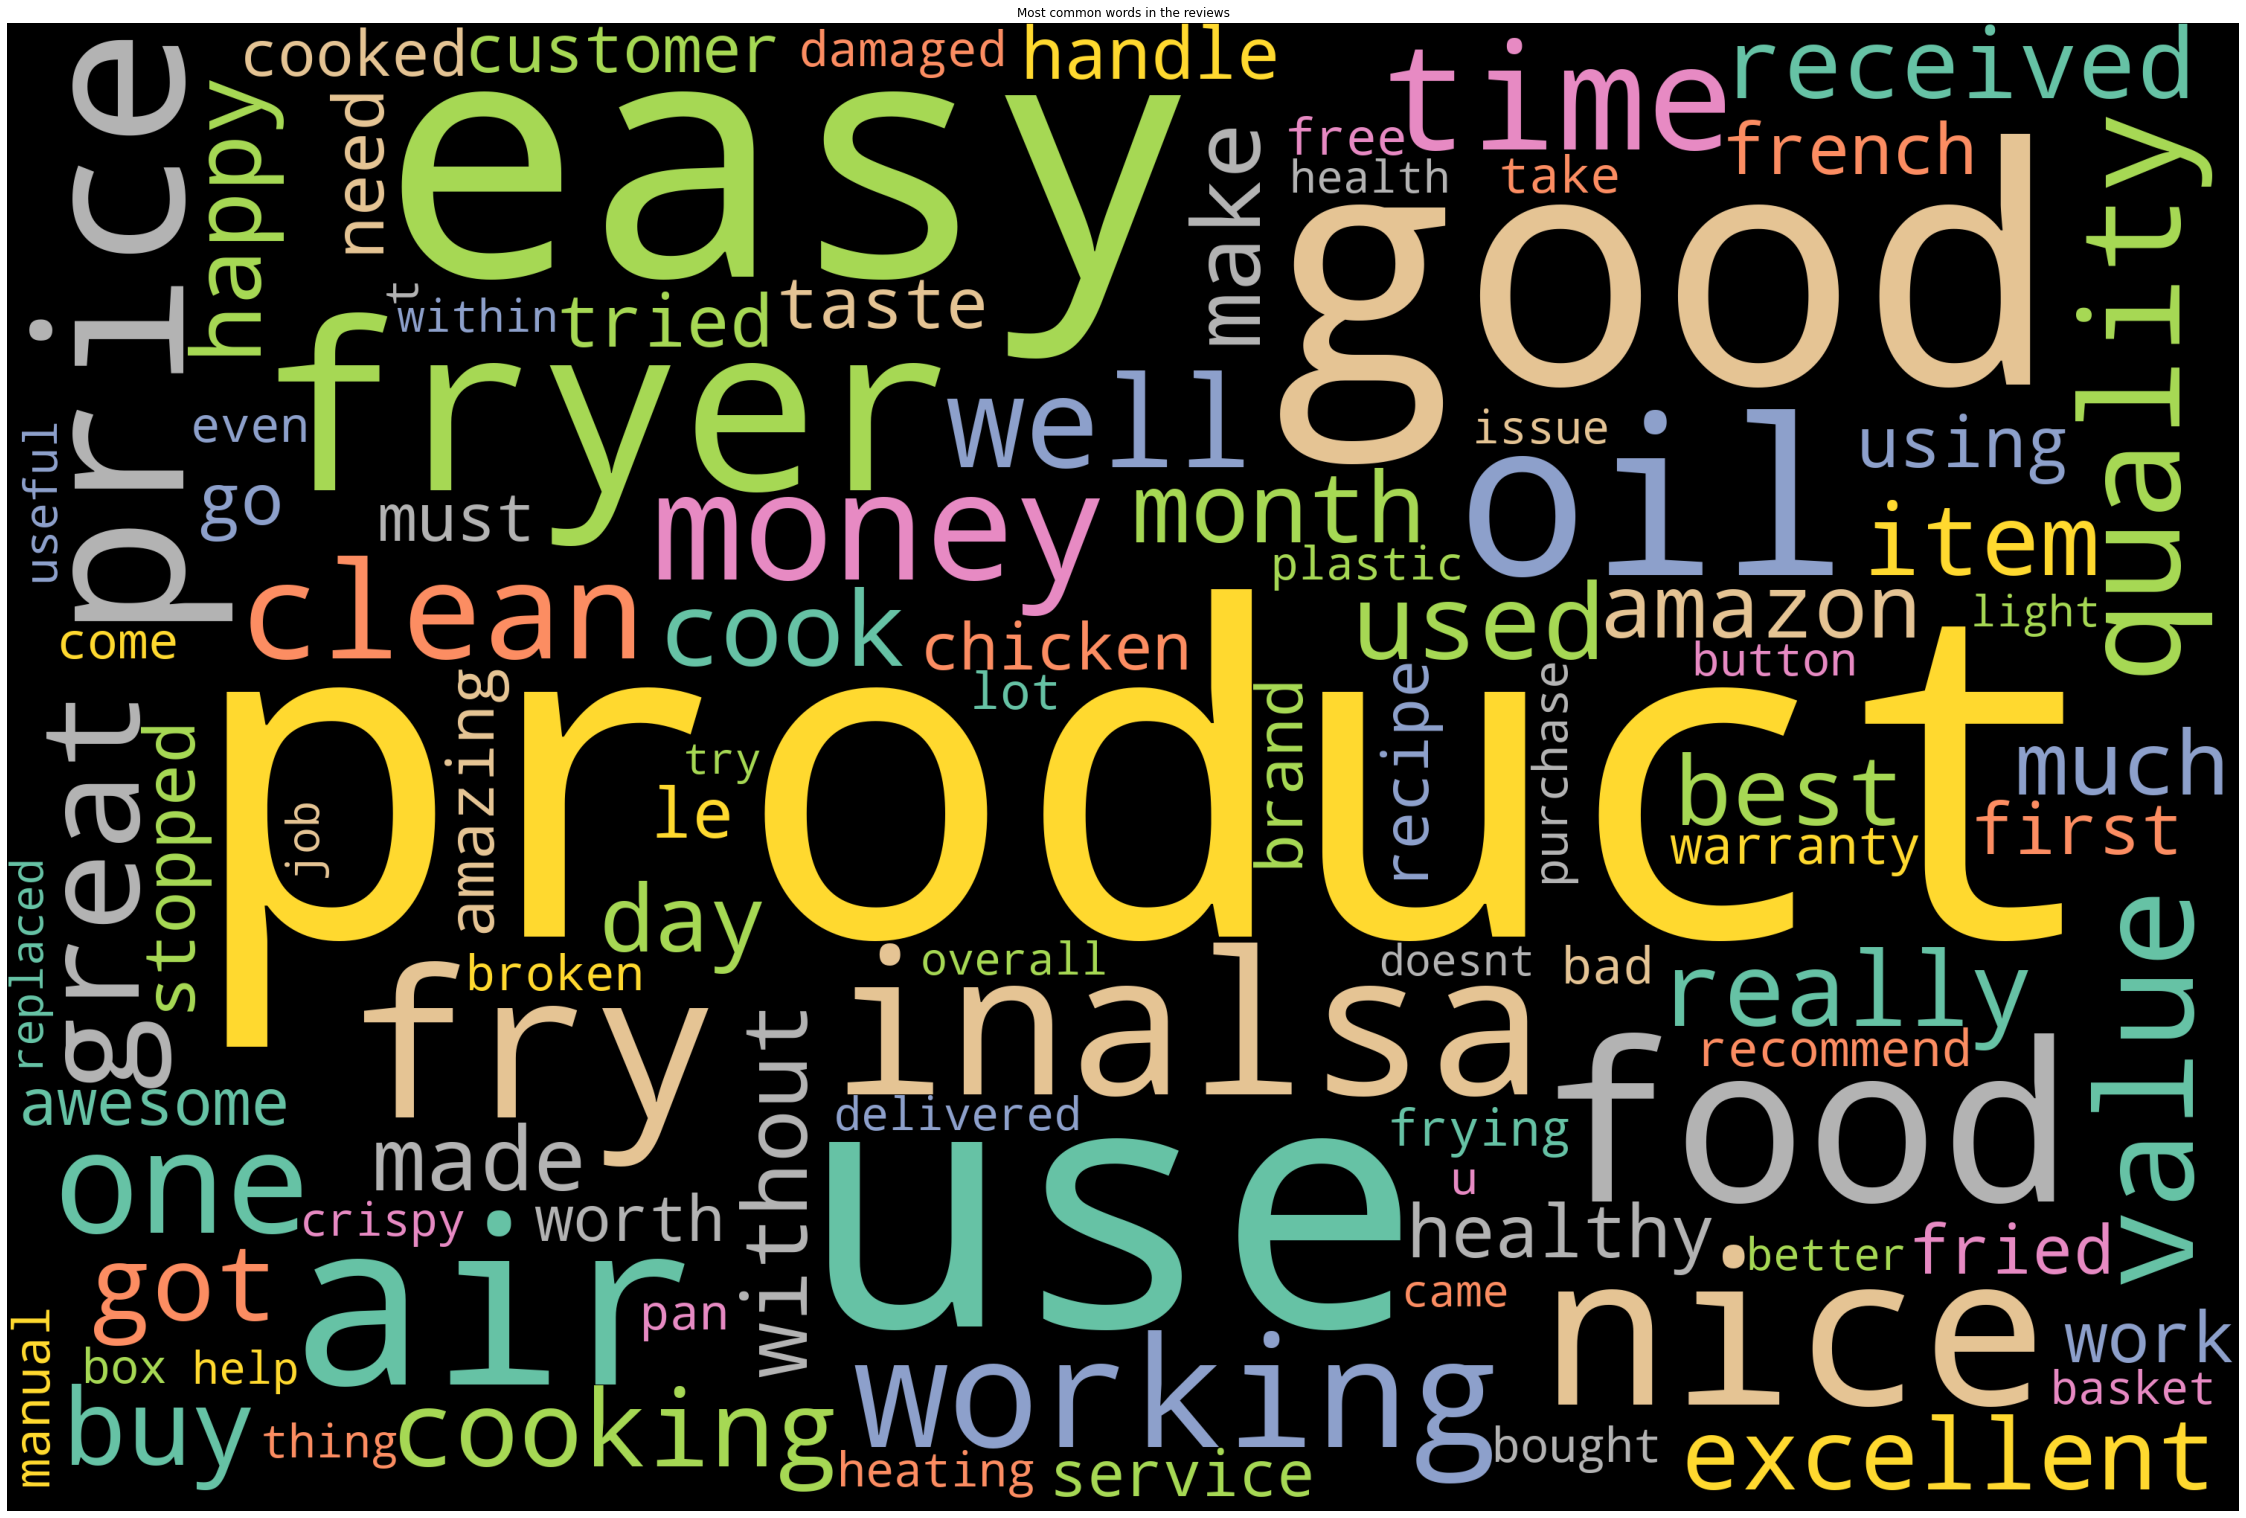

In [10]:
#Generating a wordcloud giving the view of the words based on their frequency of occurence
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(height=2000, width=3000, background_color='black', max_words=100,colormap='Set2',collocations=False)
wordcloud = wordcloud.generate(' '.join(Amazon_reviews['cleaned_reviews'].tolist()))
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

# Sentiment Analysis

In [11]:
#Analyzing the sentiment of reviews using the library 'vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [12]:
analyser.polarity_scores(Amazon_reviews.iloc[0][0])

{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.9813}

In [13]:
Amazon_reviews.iloc[31][0]

'Well, this is my first air fryer.. I must say its a wonderdul product. I made French fries , the very first time nd my kids were super happy. There is a booklet for help regarding temperature control, oil quality nd of ofcourse a few recipes. Now, I can make lot many things using almost no oil nd still crispy nd good taste wise'

In [14]:
analyser.polarity_scores(Amazon_reviews.iloc[31][0])

{'neg': 0.025, 'neu': 0.737, 'pos': 0.238, 'compound': 0.9476}

In [15]:
score_com = []
score_pos = []
score_neg = []
for i in range(0,Amazon_reviews.shape[0]):
    score = analyser.polarity_scores(Amazon_reviews.iloc[i][0])
    score1 = score['compound']
    score_com.append(score1)
    #Extract pos reviews
    score2= score['pos']
    score_pos.append(score2)
    #Extract neg reviews
    score3 = score['neg']
    score_neg.append(score3)


In [16]:
#Adding new column to data frame
Amazon_reviews["Comp_score"] = score_com
Amazon_reviews["Pos-score"] = score_pos
Amazon_reviews["Neg-score"] = score_neg

In [17]:
Amazon_reviews

Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
..                                                 ...   
584  It’s available on Flipkart for 3998 it’s a goo...   
585  Hate to say I order two for my sister to gift ...   
586                                          Awesome 👌   
587      The product has stopped working in 8 months .   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
0    value money happy product prepared food delici...      0.9813      0.463   
1    earlier gave positive review using 1 month wou...      0.4697      0.173   
2    inalsa air fryerthis awesome product 1010 valu...      0.7579      0.333   
3    bought prime day sale 15th july brand value in...     -0.6808      0.066   
4    product manufacturing defect right side plasti...     -0.6511      0.083   
..                                                 ...         ...        ...   
584  it’s available flipkart 3998 it’s good product...      0.8248      0.282   
585  hate say order two sister gift poor quality ma...     -0.9100      0.042   
586                                          awesome 👌      0.8816      1.000   
587                   product stopped working 8 month      -0.2263      0.000   
588                                                         0.0000      0.000   

     Neg-score  
0        0.000  
1        0.132  
2        0.000  
3        0.084  
4        0.315  
..         ...  
584      0.000  
585      0.290  
586      0.000  
587      0.192  
588      0.000  

[589 rows x 5 columns]

In [18]:
def Comp_score(analyser):
    if analyser >= 0.05:
        return "pos"
    elif (analyser > -0.05) and (analyser < 0.05):
        return "neu"
    else:
        return "neg"

In [19]:
Amazon_reviews['vader_labels']=Amazon_reviews['Comp_score'].apply(lambda x:Comp_score(x))

In [20]:
Amazon_reviews 

Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
..                                                 ...   
584  It’s available on Flipkart for 3998 it’s a goo...   
585  Hate to say I order two for my sister to gift ...   
586                                          Awesome 👌   
587      The product has stopped working in 8 months .   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
0    value money happy product prepared food delici...      0.9813      0.463   
1    earlier gave positive review using 1 month wou...      0.4697      0.173   
2    inalsa air fryerthis awesome product 1010 valu...      0.7579      0.333   
3    bought prime day sale 15th july brand value in...     -0.6808      0.066   
4    product manufacturing defect right side plasti...     -0.6511      0.083   
..                                                 ...         ...        ...   
584  it’s available flipkart 3998 it’s good product...      0.8248      0.282   
585  hate say order two sister gift poor quality ma...     -0.9100      0.042   
586                                          awesome 👌      0.8816      1.000   
587                   product stopped working 8 month      -0.2263      0.000   
588                                                         0.0000      0.000   

     Neg-score vader_labels  
0        0.000          pos  
1        0.132          pos  
2        0.000          pos  
3        0.084          neg  
4        0.315          neg  
..         ...          ...  
584      0.000          pos  
585      0.290          neg  
586      0.000          pos  
587      0.192          neg  
588      0.000          neu  

[589 rows x 6 columns]

In [21]:
pd.set_option("display.max_rows", 585) 
Amazon_reviews 

Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
5    My friend has this Inalsa air fryer since over...   
6    Excellent way for cooking for veg and Non-veg ...   
7    An impulse purchase based on Inalsa Brand name...   
8    Nice thing. We are fond of eating French fries...   
9    Paint of the baking tray coming off. If its pa...   
10   It was a faulty product. I complaint to their ...   
11   After a couple of months of use--the on/off Sw...   
12   I brought this after comparing other fryers di...   
13   Its broken in 1-2 months very light use. The f...   
14   I'm reviewing this 3 months after my purchase....   
15   Am writing this review after 12 days of use.. ...   
16   Helo I have purchased hairdryer of Inalsa dry ...   
17   Very good product. Used it continously for 1 h...   
18   I wanted to buy an air fryer since long so i b...   
19   I have not seen other compeny Air fryer so I c...   
20   Excellent product which is very easy to use. G...   
21   I was not sure whether buying an airfryer woul...   
22   Using it for a month now. Good product easy to...   
23   Please dont but from this seller. Was sent def...   
24   Must item for who loves fried food. As I love ...   
25   The product had a manufacturing defect due to ...   
26   Received a defective product... The customer s...   
27   I must say after much analysis of brands with ...   
28   Guys if you are not buying the product only be...   
29   I did a lot of research before buying an air f...   
30   Well, this is my first air fryer.. I must say ...   
31   My wife is looking for product which is easy t...   
32   A very useful and cost effective product. Can ...   
33   Air frier is just delivered... First of all pa...   
34   Original package had a hole on side and the pr...   
35   Useful and but bucket size is small for family...   
36   Fantastic product at most reasonable price. In...   
37   Its been a couple of weeks I am using it. Goin...   
38   Received defective product. Not able to return...   
39   I am from Port Blair, Andaman and Nicobar Isla...   
40   No user manual or booklet provided with the pr...   
41   This one is just perfect if you're planing to ...   
42   Worst ever product purchased. Never ever buy I...   
43   Well to be honest , I had minimal expectations...   
44   Bought one recently and have started making a ...   
45   It was working quite well in the beginning. Ho...   
46   Overall i would say it is good and worthy for ...   
47   I got it for for a steal on festival sale. The...   
48   Pathetic product by Inalsa! The top part heats...   
49   My mother in law and myself really wanted this...   
50   Received in good Packing. Performance is good....   
51   Minimal oil making maximum life span ...... Th...   
52   Awesome product at a very descent price.. It h...   
53   The eject button stopped working two weeks aft...   
54   Great product! Good, sturdy build, cooks perfe...   
55   Its an amazing product. Just what i expected i...   
56   Its good product and easy to use, only try onc...   
57   Very useful product for health conscious peopl...   
58   Airfryer is very good and serves the purpose. ...   
59   Body finishing is below par , tempreture contr...   
60   It is really easy to use.. first time I tried ...   
61   I am totally satisfied with the product. Cooks...   
62   Inalsa air fryer is very convenient to use, sa...   
63   Had to return the product the next day because...   
64   Built quality very poor. Handle not working wi...   
65   Absolutely flawless.. very simple to operate.....   
66   Inalsa air fryer is easy to use and helps cook...   
67   The INALSA air fryer has been my companion in ...   
68   Really nice product from inalsa and it's

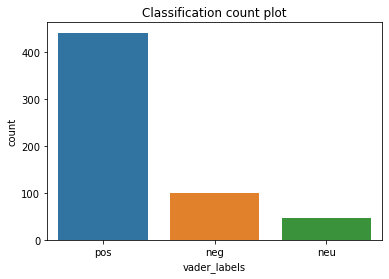

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data= Amazon_reviews, x='vader_labels')
plt.title('Classification count plot');

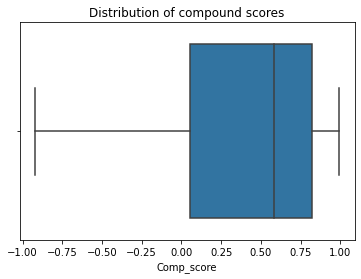

In [22]:
sns.boxplot(data=Amazon_reviews,x='Comp_score')
plt.title('Distribution of compound scores');

In [23]:
#75% are feeling positive about the product
Amazon_reviews['vader_labels'].value_counts()/len(Amazon_reviews)

pos    0.750424
neg    0.171477
neu    0.078098
Name: vader_labels, dtype: float64

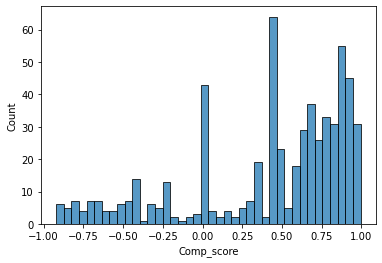

In [24]:
#customers are quite happy with the product comparing the other side
sns.histplot(data=Amazon_reviews,x='Comp_score',bins=40);

In [25]:
positive_reviews=Amazon_reviews.loc[Amazon_reviews['vader_labels']=='pos','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['value money happy product prepared food delicious thankyou inalsa amazon providing good product start day oil free dish ',
 'earlier gave positive review using 1 month would like take back good thing said product indeed cheap polish tray coming disappointing customer service doesnt credibility make fake commitment time whenever contacted best youve also purchased item unfortunate buyer sumit saxena',
 'inalsa air fryerthis awesome product 1010 value money 1010 philip v inalsa inalsa1010',
 'friend inalsa air fryer since year considering happy purchase bought air fryer price 4377 plus additional 10 sbi discount got delivered day utter disappointment air fryer stopped working first day simply dead ordered replacement replacement air fryer came another 24 hour kinda sceptical point tried air fryer immediately arrived surprise minor scratch paid least attention towards tried using air fryer worked writing review around 23 month usage say working quite nicely made many dish experience goo

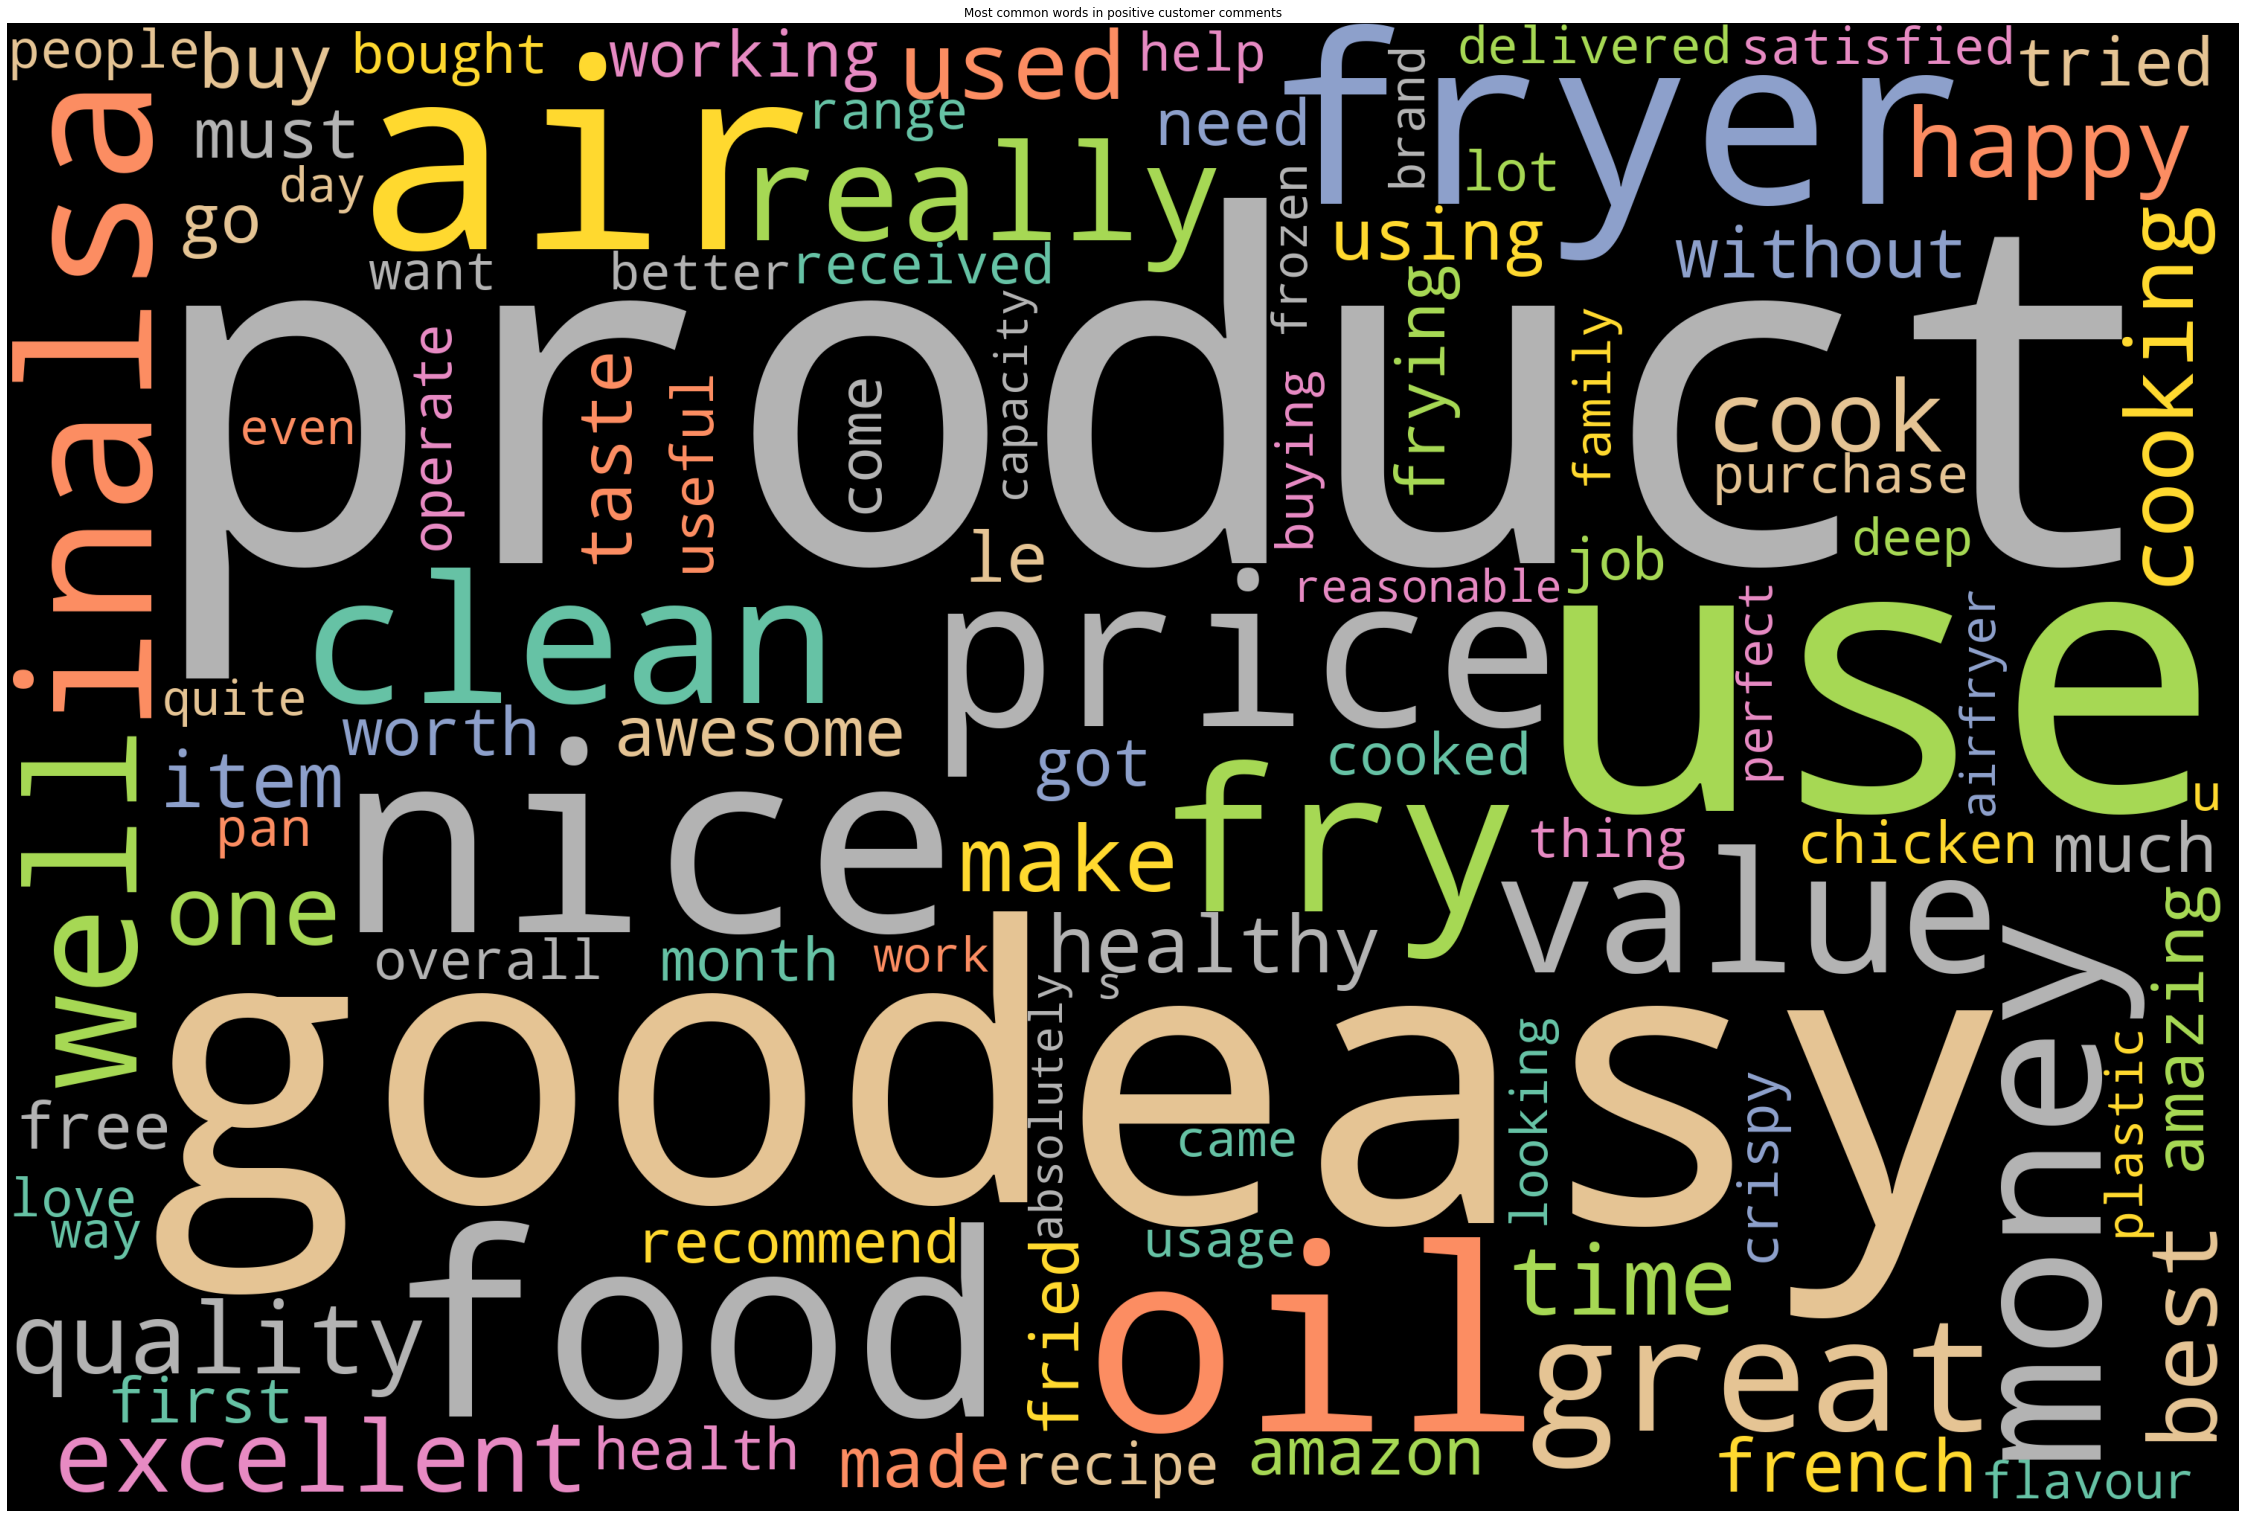

In [26]:
#Generating wordclouds for positive reviews
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=3000, background_color='black', max_words=100,colormap='Set2',collocations=False)
wordcloud = wordcloud.generate(' '.join(Amazon_reviews.loc[Amazon_reviews['vader_labels']=='pos','cleaned_reviews'].tolist()))
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

In [27]:
negative_reviews=Amazon_reviews.loc[Amazon_reviews['vader_labels']=='neg','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['bought prime day sale 15th july brand value inalsa product great value money also product first try product tried using mccain potato cube started fryer wall going great 45 min suddenly heating light went thought cycle thing 1015 sec later power light went timer still running spring based tried take container reinsert power heating light went online realised left handle pressure based soon left pressure handle might connection problem due loose grip light went gave 23 try normally holding thinking one thing happened immediately ordered return quick although problem piece lost interest product potato bite actually get cooked properly lost trust mechanism try brand time',
 'product manufacturing defect right side plastic body found detached appears defect overlooked box apparent damage',
 'impulse purchase based inalsa brand name disappointed product got delivered evening 27july 2019 yesterday opened morning 28th tried cooking french fry product worked flawlessly first 10 min 10 min sh

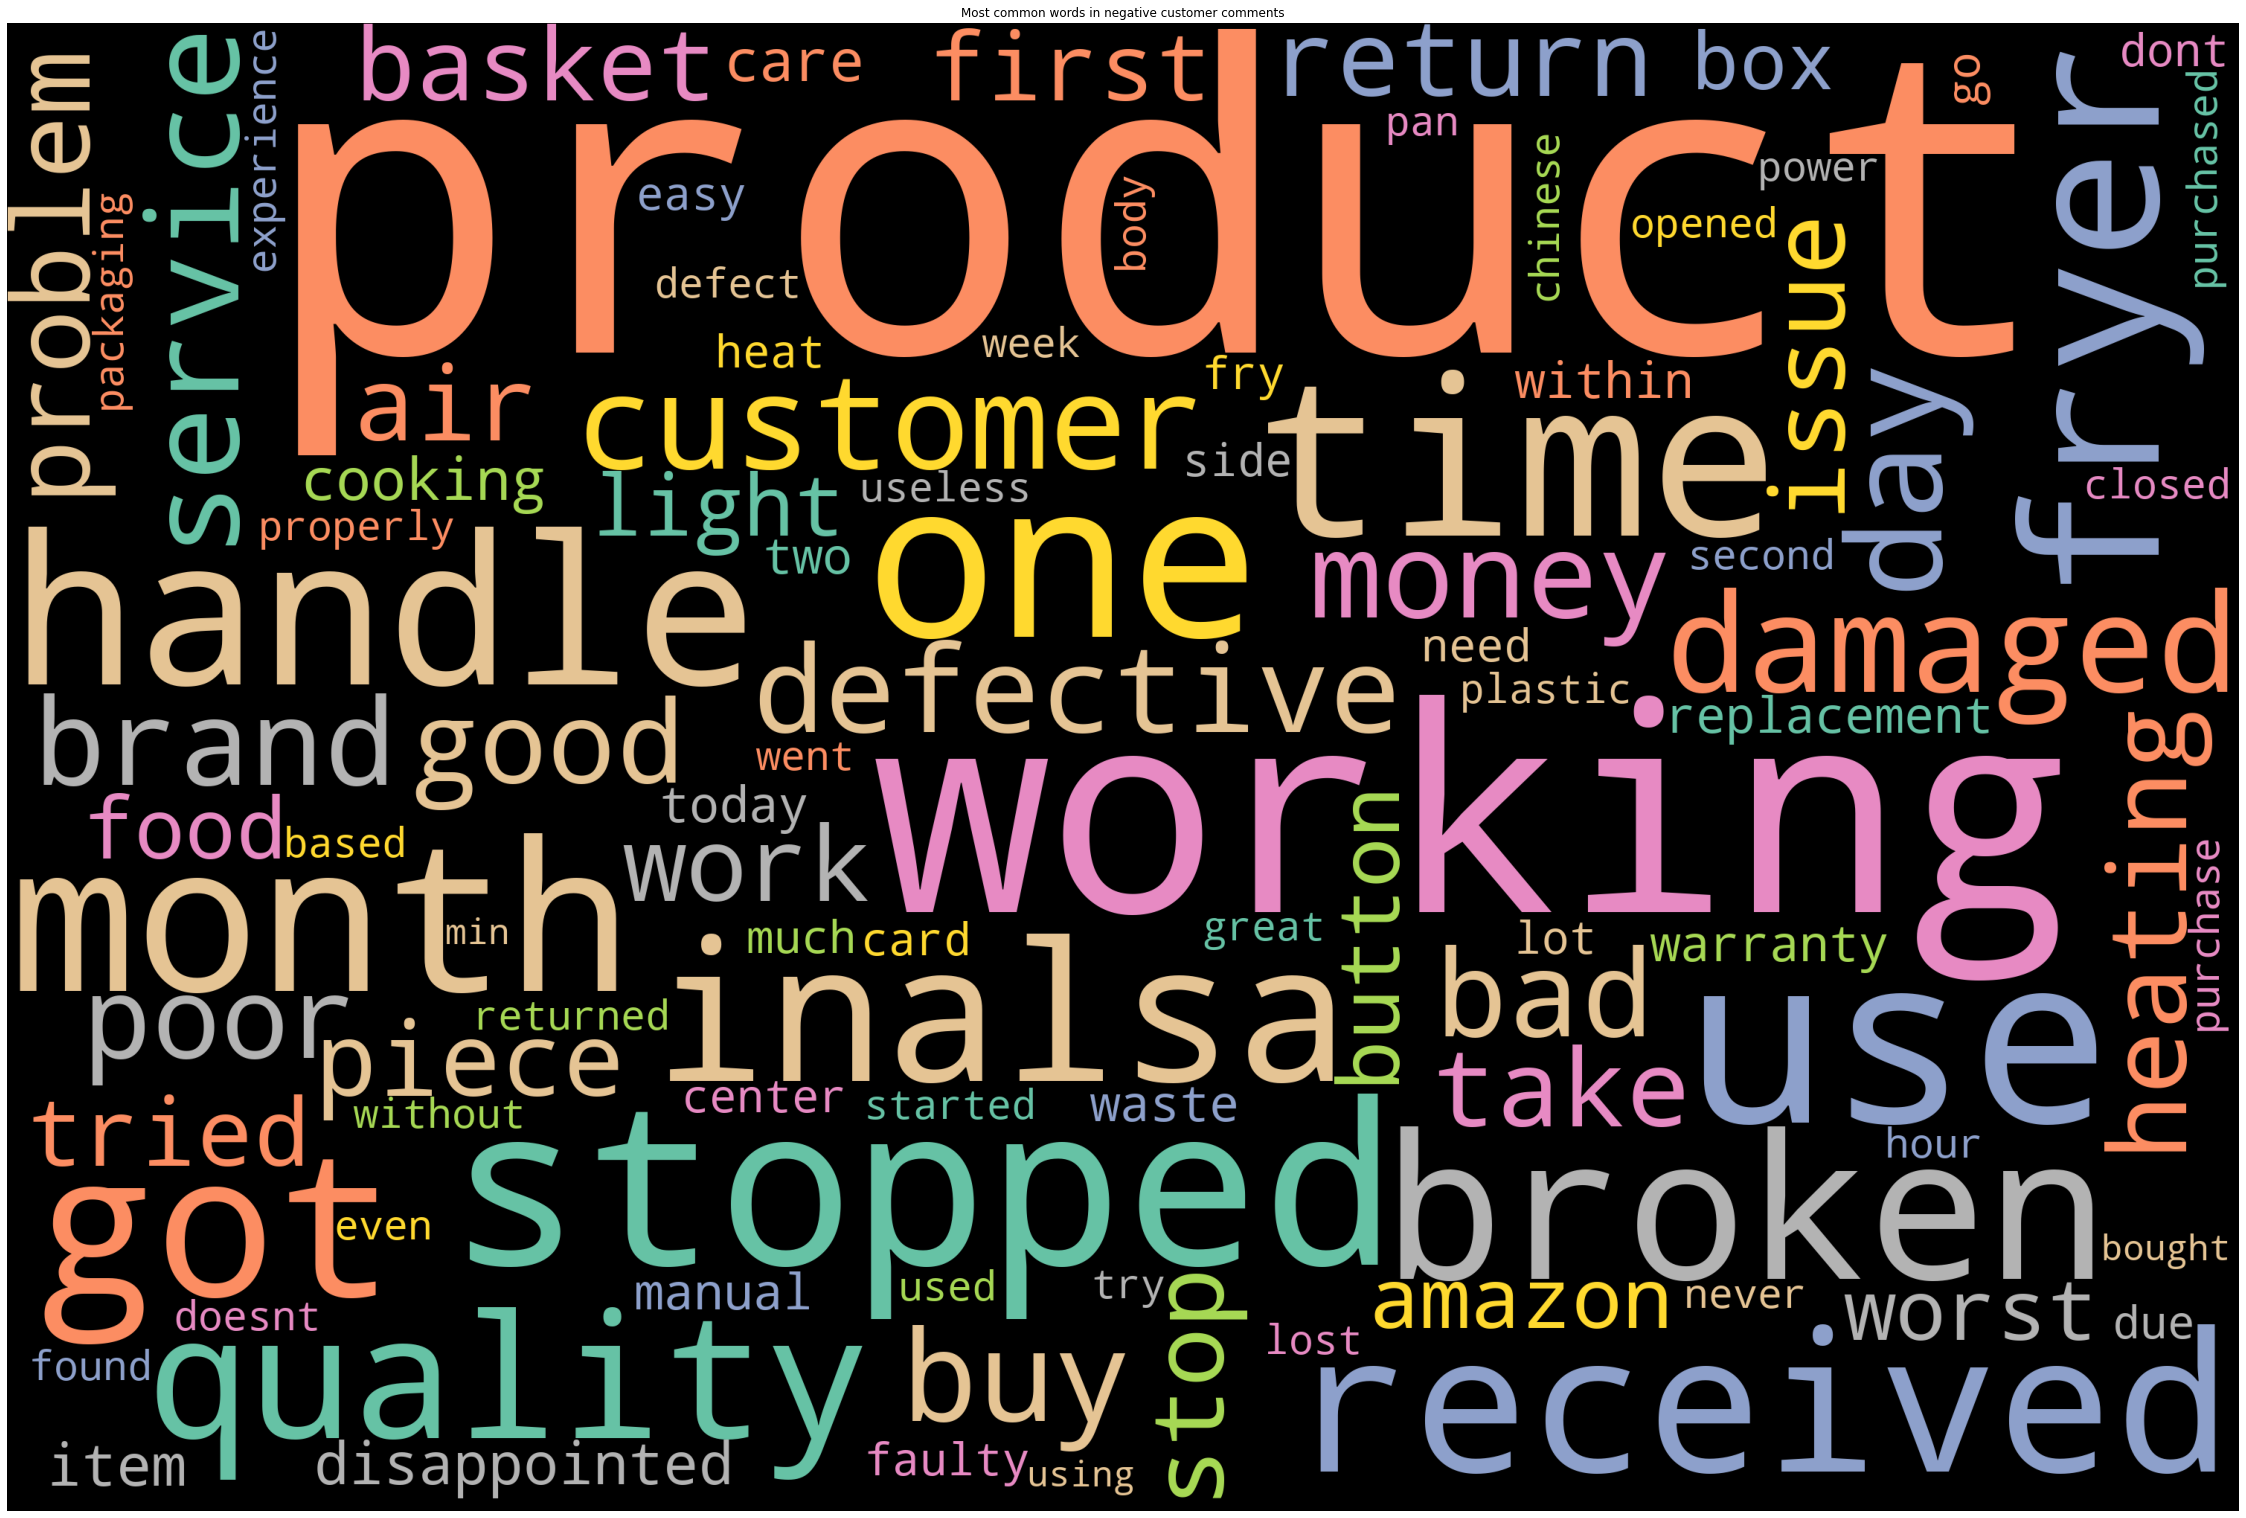

In [28]:
#Generating wordclouds for negative reviews
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=3000, background_color='black', max_words=100,colormap='Set2',collocations=False)
wordcloud = wordcloud.generate(' '.join(Amazon_reviews.loc[Amazon_reviews['vader_labels']=='neg','cleaned_reviews'].tolist()))
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

In [29]:
neutral_reviews=Amazon_reviews.loc[Amazon_reviews['vader_labels']=='neu','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
neutral_reviews[5:10]

['us fitting drawer connecting put wad paper point connects fryer work never',
 'got product yesterday opened box today surprise find instructional manual warranty card wondering got usedreturned piece also get missing paper',
 'badly handled amazon delivery warranty card bill seems product used decided return immediately friend buy local shop better',
 'heating doesnt work unfortunately opened 15 day later traveling kept open try heating even hour need replaced asap',
 'working properly']

# Emotion mining

In [30]:
pos_reviews = Amazon_reviews[Amazon_reviews['vader_labels']=='pos']
pos_reviews.head()

Reviews  \
0  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1  Earlier I gave a positive review, but after us...   
2  Inalsa Air Fryer...this is awesome product ......   
5  My friend has this Inalsa air fryer since over...   
6  Excellent way for cooking for veg and Non-veg ...   

                                     cleaned_reviews  Comp_score  Pos-score  \
0  value money happy product prepared food delici...      0.9813      0.463   
1  earlier gave positive review using 1 month wou...      0.4697      0.173   
2  inalsa air fryerthis awesome product 1010 valu...      0.7579      0.333   
5  friend inalsa air fryer since year considering...      0.9642      0.141   
6  excellent way cooking veg nonveg family perfec...      0.9577      0.186   

   Neg-score vader_labels  
0      0.000          pos  
1      0.132          pos  
2      0.000          pos  
5      0.054          pos  
6      0.052          pos

In [31]:
pos_reviews.columns

Index(['Reviews', 'cleaned_reviews', 'Comp_score', 'Pos-score', 'Neg-score',
       'vader_labels'],
      dtype='object')

In [32]:
#pos_reviews.sort_values(by='Comp_score', ascending=False)

Reviews  \
18   I wanted to buy an air fryer since long so i b...   
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
49   My mother in law and myself really wanted this...   
507  Just WOW product.comes with very high capacity...   
32   A very useful and cost effective product. Can ...   
..                                                 ...   
282  It caught fire the first time I switched it on...   
233  The paint quality is very bad, it's started pe...   
363  Air Fryer Recipe book not received in the box....   
110  I have been using this airfryer from inalsa fr...   
306  Value for money... have used Phillips air frye...   

                                       cleaned_reviews  Comp_score  Pos-score  \
18   i wanted to buy an air fryer since long so i b...      0.9943      0.230   
0    it is more than value for money happy with the...      0.9813      0.463   
49   my mother in law and myself really wanted this...      0.9794      0.325   
507  just wow productcomes with very high capacity ...      0.9790      0.384   
32   a very useful and cost effective product can b...      0.9788      0.267   
..                                                 ...         ...        ...   
282  it caught fire the first time i switched it on...      0.1027      0.154   
233  the paint quality is very bad it started peeli...      0.0790      0.177   
363  air fryer recipe book not received in the box ...      0.0772      0.085   
110  i have been using this airfryer from inalsa fr...      0.0516      0.081   
306  value for money have used phillips air fryer a...      0.0516      0.129   

     Neg-score vader_labels  
18       0.013          pos  
0        0.000          pos  
49       0.025          pos  
507      0.000          pos  
32       0.015          pos  
..         ...          ...  
282      0.132          pos  
233      0.131          pos  
363      0.000          pos  
110      0.076          pos  
306      0.118          pos  

[438 rows x 6 columns]

In [32]:
pos_reviews.sort_values(by='Pos-score', ascending=False)

Reviews  \
586                                          Awesome 👌   
327                                               Good   
488                                          Like best   
494                                          Excellent   
413                                                Wow   
..                                                 ...   
78   Easy to use and gpod quality product.. Must bu...   
11   After a couple of months of use--the on/off Sw...   
16   Helo I have purchased hairdryer of Inalsa dry ...   
34   Air frier is just delivered... First of all pa...   
9    Paint of the baking tray coming off. If its pa...   

                                       cleaned_reviews  Comp_score  Pos-score  \
586                                          awesome 👌      0.8816      1.000   
327                                               good      0.4404      1.000   
488                                          like best      0.7717      1.000   
494                                          excellent      0.5719      1.000   
413                                                wow      0.5859      1.000   
..                                                 ...         ...        ...   
78   easy use gpod quality product must buy family ...      0.4404      0.073   
11   couple month usethe onoff switch stopped worki...      0.3182      0.064   
16   helo purchased hairdryer inalsa dry light 24 a...      0.6124      0.061   
34   air frier delivered first package even sealed ...      0.5574      0.052   
9    paint baking tray coming paint much bad health...      0.2500      0.047   

     Neg-score vader_labels  
586      0.000          pos  
327      0.000          pos  
488      0.000          pos  
494      0.000          pos  
413      0.000          pos  
..         ...          ...  
78       0.000          pos  
11       0.038          pos  
16       0.000          pos  
34       0.000          pos  
9        0.039          pos  

[442 rows x 6 columns]

In [33]:
#################the most positive review given by customer###########
(Amazon_reviews.iloc[586][0])

'Awesome 👌'

In [34]:
analyser.polarity_scores(Amazon_reviews.iloc[586][0])

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.8816}

In [57]:
pd.set_option("display.max_rows", 438) 
pos_reviews 

Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
5    My friend has this Inalsa air fryer since over...   
6    Excellent way for cooking for veg and Non-veg ...   
8    Nice thing. We are fond of eating French fries...   
9    Paint of the baking tray coming off. If its pa...   
11   After a couple of months of use--the on/off Sw...   
12   I brought this after comparing other fryers di...   
14   I'm reviewing this 3 months after my purchase....   
16   Helo I have purchased hairdryer of Inalsa dry ...   
17   Very good product. Used it continously for 1 h...   
18   I wanted to buy an air fryer since long so i b...   
20   Excellent product which is very easy to use. G...   
21   I was not sure whether buying an airfryer woul...   
22   Using it for a month now. Good product easy to...   
24   Must item for who loves fried food. As I love ...   
27   I must say after much analysis of brands with ...   
28   Guys if you are not buying the product only be...   
29   I did a lot of research before buying an air f...   
30   Well, this is my first air fryer.. I must say ...   
31   My wife is looking for product which is easy t...   
32   A very useful and cost effective product. Can ...   
33   Air frier is just delivered... First of all pa...   
35   Useful and but bucket size is small for family...   
36   Fantastic product at most reasonable price. In...   
37   Its been a couple of weeks I am using it. Goin...   
38   Received defective product. Not able to return...   
41   This one is just perfect if you're planing to ...   
43   Well to be honest , I had minimal expectations...   
46   Overall i would say it is good and worthy for ...   
47   I got it for for a steal on festival sale. The...   
49   My mother in law and myself really wanted this...   
50   Received in good Packing. Performance is good....   
51   Minimal oil making maximum life span ...... Th...   
52   Awesome product at a very descent price.. It h...   
54   Great product! Good, sturdy build, cooks perfe...   
55   Its an amazing product. Just what i expected i...   
57   Very useful product for health conscious peopl...   
58   Airfryer is very good and serves the purpose. ...   
60   It is really easy to use.. first time I tried ...   
61   I am totally satisfied with the product. Cooks...   
62   Inalsa air fryer is very convenient to use, sa...   
65   Absolutely flawless.. very simple to operate.....   
66   Inalsa air fryer is easy to use and helps cook...   
67   The INALSA air fryer has been my companion in ...   
68   Really nice product from inalsa and it's in bu...   
70   Inalsa Airfryer is so good and easy to use. De...   
71   Product is up to the mark. I have made fries i...   
72   Its a good product, really a good buy if you'r...   
73   ordered this after looking at majority positiv...   
74   Made amazing fries, chicken, crispy corn and a...   
76   Easy to use and gpod quality product.. Must bu...   
80   Since the cost is less you might be tempted to...   
82   Bought this product less than a month ago and ...   
84   Product quantity is good and it's easy to use ...   
86   Was very sceptical at first but with the 4 sta...   
87   Good-. On-time delivery.. Cooking is easy.. Ba...   
88   Good product though I had to replace the first...   
89   Reasonable price as compared to other brands. ...   
92   Excellent product, very crisp fries, spring ro...   
93   Absolutely loving it.. Tried the french fries ...   
95   They get heated soon and are good. I made fren...   
96   It is quite an easy to use product that makes ...   
98   Quite handy and easy to use n clean too. I bou...   
99   Easy to use and friendly. Good Capacity. worth...   
101  It cooks really well. Very convenient and heal...   
102  Product is easy to use. Decent value for money...   
104  Good product and also delivered on time.

In [35]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mypc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mypc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mypc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
#!pip install text2emotion
import text2emotion

def get_emotion(Amazon_reviews,feature):
    emotions = {}
    for ind in Amazon_reviews.index:
        dic = text2emotion.get_emotion(Amazon_reviews[feature][ind])
        for key,value in dic.items():
            if key not in emotions.keys():
                emotions[key] = value
            else:
                if not isinstance(emotions[key], list):
                    # If type is not list then make it list
                    emotions[key] = [emotions[key]]
                    emotions[key].append(value)
                else:
                    # Append the value in list
                    emotions[key].append(value)
    return emotions

In [37]:
# Emotion mining for positive reviews
emotions = get_emotion(pos_reviews,'Reviews')
for key in list(emotions.keys()):
    pos_reviews[key] = emotions[key]
pos_reviews

<ipython-input-37-1fe795c10292>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_reviews[key] = emotions[key]


Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
5    My friend has this Inalsa air fryer since over...   
6    Excellent way for cooking for veg and Non-veg ...   
..                                                 ...   
579                               Easy fr frozen foods   
581                                       Good product   
582                                         Very good.   
584  It’s available on Flipkart for 3998 it’s a goo...   
586                                          Awesome 👌   

                                       cleaned_reviews  Comp_score  Pos-score  \
0    value money happy product prepared food delici...      0.9813      0.463   
1    earlier gave positive review using 1 month wou...      0.4697      0.173   
2    inalsa air fryerthis awesome product 1010 valu...      0.7579      0.333   
5    friend inalsa air fryer since year considering...      0.9642      0.141   
6    excellent way cooking veg nonveg family perfec...      0.9577      0.186   
..                                                 ...         ...        ...   
579                                easy fr frozen food      0.4404      0.492   
581                                       good product      0.4404      0.744   
582                                               good      0.4927      0.762   
584  it’s available flipkart 3998 it’s good product...      0.8248      0.282   
586                                          awesome 👌      0.8816      1.000   

     Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  
0        0.000          pos   0.80   0.00      0.00  0.20  0.00  
1        0.132          pos   0.07   0.07      0.29  0.36  0.21  
2        0.000          pos   0.00   0.00      1.00  0.00  0.00  
5        0.054          pos   0.28   0.00      0.24  0.16  0.32  
6        0.052          pos   0.12   0.00      0.25  0.31  0.31  
..         ...          ...    ...    ...       ...   ...   ...  
579      0.000          pos   0.00   0.00      0.00  0.00  0.00  
581      0.000          pos   1.00   0.00      0.00  0.00  0.00  
582      0.000          pos   1.00   0.00      0.00  0.00  0.00  
584      0.000          pos   0.67   0.00      0.00  0.00  0.33  
586      0.000          pos   0.00   0.00      1.00  0.00  0.00  

[442 rows x 11 columns]

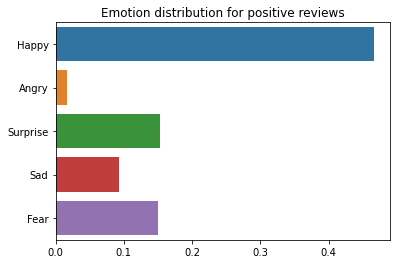

In [38]:
# Visualization
import numpy as np
total = {}
for key, value in list(emotions.items()):
    total[key] = np.mean(value)
sns.barplot(y=list(total.keys()),x=list(total.values()))
plt.title('Emotion distribution for positive reviews');

In [39]:
neg_reviews = Amazon_reviews[Amazon_reviews['vader_labels']=='neg']
neg_reviews.head()

Reviews  \
3   I bought this in the prime day sale on 15th Ju...   
4   Product has manufacturing defect as the right ...   
7   An impulse purchase based on Inalsa Brand name...   
10  It was a faulty product. I complaint to their ...   
13  Its broken in 1-2 months very light use. The f...   

                                      cleaned_reviews  Comp_score  Pos-score  \
3   bought prime day sale 15th july brand value in...     -0.6808      0.066   
4   product manufacturing defect right side plasti...     -0.6511      0.083   
7   impulse purchase based inalsa brand name disap...     -0.2263      0.092   
10  faulty product complaint customer care told te...     -0.9219      0.090   
13  broken 12 month light use food pan automatic s...     -0.7729      0.000   

    Neg-score vader_labels  
3       0.084          neg  
4       0.315          neg  
7       0.103          neg  
10      0.183          neg  
13      0.229          neg

In [40]:
neg_reviews.sort_values(by='Neg-score', ascending=False)

Reviews  \
378                                            Useless   
490                                      Worst product   
349                               Poor Chinese product   
402                         received defective product   
268                           Slightly damaged product   
..                                                 ...   
3    I bought this in the prime day sale on 15th Ju...   
112  Iti purchased Inalsa airfrier in june'20, but ...   
231  I bought the product yesterday and today it wa...   
40   I am from Port Blair, Andaman and Nicobar Isla...   
19   I have not seen other compeny Air fryer so I c...   

                                       cleaned_reviews  Comp_score  Pos-score  \
378                                            useless     -0.4215      0.000   
490                                      worst product     -0.6249      0.000   
349                               poor chinese product     -0.4767      0.000   
402                         received defective product     -0.4404      0.000   
268                           slightly damaged product     -0.3832      0.000   
..                                                 ...         ...        ...   
3    bought prime day sale 15th july brand value in...     -0.6808      0.066   
112  iti purchased inalsa airfrier june20 stopped w...     -0.3291      0.000   
231  bought product yesterday today working turned ...     -0.2411      0.000   
40   port blair andaman nicobar island 11th feb 202...     -0.3291      0.000   
19   seen compeny air fryer compare product make 🍟 ...     -0.2617      0.000   

     Neg-score vader_labels  
378      1.000          neg  
490      0.804          neg  
349      0.608          neg  
402      0.592          neg  
268      0.566          neg  
..         ...          ...  
3        0.084          neg  
112      0.070          neg  
231      0.070          neg  
40       0.041          neg  
19       0.035          neg  

[101 rows x 6 columns]

In [41]:
#################the most negative review given by customer###########
(Amazon_reviews.iloc[378][0])

'Useless'

In [42]:
analyser.polarity_scores(Amazon_reviews.iloc[378][0])

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}

In [43]:
# Emotion mining for negative reviews 
emotions = get_emotion(neg_reviews,'Reviews')
for key in list(emotions.keys()):
    neg_reviews[key] = emotions[key]
neg_reviews

<ipython-input-43-9ce3c54b8358>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews[key] = emotions[key]


Reviews  \
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
7    An impulse purchase based on Inalsa Brand name...   
10   It was a faulty product. I complaint to their ...   
13   Its broken in 1-2 months very light use. The f...   
..                                                 ...   
562  Very low quality product plus the lock got dam...   
580  Stopped working only after a month. Very bad p...   
583  We expected good service but I salsa is very b...   
585  Hate to say I order two for my sister to gift ...   
587      The product has stopped working in 8 months .   

                                       cleaned_reviews  Comp_score  Pos-score  \
3    bought prime day sale 15th july brand value in...     -0.6808      0.066   
4    product manufacturing defect right side plasti...     -0.6511      0.083   
7    impulse purchase based inalsa brand name disap...     -0.2263      0.092   
10   faulty product complaint customer care told te...     -0.9219      0.090   
13   broken 12 month light use food pan automatic s...     -0.7729      0.000   
..                                                 ...         ...        ...   
562  low quality product plus lock got damaged 2 da...     -0.4201      0.077   
580  stopped working month bad product please dont buy     -0.4818      0.149   
583  expected good service salsa bad customer servi...     -0.6046      0.114   
585  hate say order two sister gift poor quality ma...     -0.9100      0.042   
587                   product stopped working 8 month      -0.2263      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  
3        0.084          neg   0.15   0.15      0.21  0.18  0.30  
4        0.315          neg   0.00   0.00      0.00  0.25  0.75  
7        0.103          neg   0.00   0.05      0.18  0.41  0.36  
10       0.183          neg   0.19   0.06      0.19  0.38  0.19  
13       0.229          neg   0.00   0.00      0.50  0.25  0.25  
..         ...          ...    ...    ...       ...   ...   ...  
562      0.178          neg   0.33   0.00      0.33  0.33  0.00  
580      0.330          neg   0.00   0.00      0.00  0.67  0.33  
583      0.151          neg   0.33   0.00      0.00  0.33  0.33  
585      0.290          neg   0.12   0.12      0.50  0.25  0.00  
587      0.192          neg   0.00   0.00      0.00  0.00  1.00  

[101 rows x 11 columns]

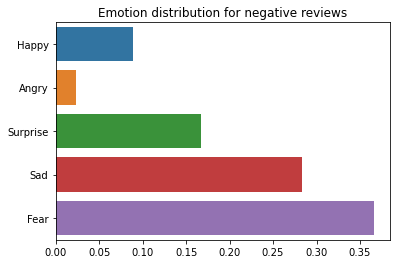

In [44]:
# Visualization
total = {}
for key, value in list(emotions.items()):
    total[key] = np.mean(value)
sns.barplot(y=list(total.keys()),x=list(total.values()))
plt.title('Emotion distribution for negative reviews');

In [45]:
# Emotion mining  
#further analysisng for rating the most Happy,Sad,Angry,surprise,fear
emotions = get_emotion(Amazon_reviews,'Reviews')
for key in list(emotions.keys()):
    Amazon_reviews[key] = emotions[key]
Amazon_reviews

Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
..                                                 ...   
584  It’s available on Flipkart for 3998 it’s a goo...   
585  Hate to say I order two for my sister to gift ...   
586                                          Awesome 👌   
587      The product has stopped working in 8 months .   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
0    value money happy product prepared food delici...      0.9813      0.463   
1    earlier gave positive review using 1 month wou...      0.4697      0.173   
2    inalsa air fryerthis awesome product 1010 valu...      0.7579      0.333   
3    bought prime day sale 15th july brand value in...     -0.6808      0.066   
4    product manufacturing defect right side plasti...     -0.6511      0.083   
..                                                 ...         ...        ...   
584  it’s available flipkart 3998 it’s good product...      0.8248      0.282   
585  hate say order two sister gift poor quality ma...     -0.9100      0.042   
586                                          awesome 👌      0.8816      1.000   
587                   product stopped working 8 month      -0.2263      0.000   
588                                                         0.0000      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  
0        0.000          pos   0.80   0.00      0.00  0.20  0.00  
1        0.132          pos   0.07   0.07      0.29  0.36  0.21  
2        0.000          pos   0.00   0.00      1.00  0.00  0.00  
3        0.084          neg   0.15   0.15      0.21  0.18  0.30  
4        0.315          neg   0.00   0.00      0.00  0.25  0.75  
..         ...          ...    ...    ...       ...   ...   ...  
584      0.000          pos   0.67   0.00      0.00  0.00  0.33  
585      0.290          neg   0.12   0.12      0.50  0.25  0.00  
586      0.000          pos   0.00   0.00      1.00  0.00  0.00  
587      0.192          neg   0.00   0.00      0.00  0.00  1.00  
588      0.000          neu   0.00   0.00      0.00  0.00  0.00  

[589 rows x 11 columns]

In [46]:
Amazon_reviews.sort_values(by='Happy', ascending=False)

Reviews  \
483                                               Nice   
470                                               Nice   
165  Very good product...... It's very easy to use ...   
167             Its a good product and value for money   
327                                               Good   
..                                                 ...   
312  I tried bhindi fried .... Not satisfied with t...   
311  Value for money... have used Phillips air frye...   
310           Very easy to use but its handle is loose   
308  Its easy to use and easy to maintain. Inalsa p...   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
483                                               nice      0.4215      1.000   
470                                               nice      0.4215      1.000   
165       good product easy use clean highly recommend      0.8974      0.543   
167                           good product value money      0.6486      0.469   
327                                               good      0.4404      1.000   
..                                                 ...         ...        ...   
312  tried bhindi fried satisfied product disappointed     -0.6632      0.000   
311  value money used phillips air fryer also diffe...      0.0516      0.129   
310                              easy use handle loose     -0.2152      0.174   
308  easy use easy maintain inalsa product worth bu...      0.7717      0.435   
588                                                         0.0000      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise  Sad  Fear  
483      0.000          pos    1.0    0.0       0.0  0.0   0.0  
470      0.000          pos    1.0    0.0       0.0  0.0   0.0  
165      0.000          pos    1.0    0.0       0.0  0.0   0.0  
167      0.000          pos    1.0    0.0       0.0  0.0   0.0  
327      0.000          pos    1.0    0.0       0.0  0.0   0.0  
..         ...          ...    ...    ...       ...  ...   ...  
312      0.376          neg    0.0    0.0       0.0  1.0   0.0  
311      0.118          pos    0.0    0.0       0.0  0.0   0.0  
310      0.245          neg    0.0    0.0       0.0  0.0   0.0  
308      0.000          pos    0.0    0.0       0.0  0.0   1.0  
588      0.000          neu    0.0    0.0       0.0  0.0   0.0  

[589 rows x 11 columns]

In [47]:
Amazon_reviews.sort_values(by='Angry', ascending=False)

Reviews  \
260  Well, surely a buy primarily for those who is ...   
269  Outer surface very shining & only two switches...   
207  I used the product for preparing snacks. The s...   
36   Useful and but bucket size is small for family...   
133  Quick delivery by Amazon. Got it at a great pr...   
..                                                 ...   
205  Great product to lead a healthier lifestyle. T...   
204  Very good product, modern look, durable build ...   
202  Air fried chicken tast not good and get smell ...   
201  Very useful and makes delicious chicken withou...   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
260  well surely buy primarily looking minimise usa...      0.6124      0.227   
269  outer surface shining two switch keep dust fre...      0.7351      0.267   
207  used product preparing snack snack got prepare...      0.7438      0.289   
36   useful bucket size small family 4 second servi...      0.8735      0.153   
133  quick delivery amazon got great price excellen...      0.9468      0.361   
..                                                 ...         ...        ...   
205  great product lead healthier lifestyle product...      0.9062      0.381   
204  good product modern look durable build quality...      0.8313      0.494   
202  air fried chicken tast good get smell heater q...     -0.3412      0.000   
201  useful make delicious chicken without oil temp...      0.9422      0.514   
588                                                         0.0000      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  
260      0.000          pos   0.00    1.0       0.0  0.00   0.0  
269      0.000          pos   0.50    0.5       0.0  0.00   0.0  
207      0.000          pos   0.50    0.5       0.0  0.00   0.0  
36       0.000          pos   0.00    0.4       0.4  0.20   0.0  
133      0.000          pos   0.40    0.4       0.2  0.00   0.0  
..         ...          ...    ...    ...       ...   ...   ...  
205      0.000          pos   1.00    0.0       0.0  0.00   0.0  
204      0.000          pos   0.50    0.0       0.0  0.00   0.5  
202      0.131          neg   0.25    0.0       0.0  0.25   0.5  
201      0.000          pos   0.20    0.0       0.0  0.20   0.6  
588      0.000          neu   0.00    0.0       0.0  0.00   0.0  

[589 rows x 11 columns]

In [48]:
Amazon_reviews.sort_values(by='Surprise', ascending=False)

Reviews  \
578                           Best in this price range   
121                              Easy to use and best.   
180  Best air fryer in this segment .excellent perf...   
402                         received defective product   
177  This item packaging is broken and its Thermado...   
..                                                 ...   
283                           Full paisa basil product   
282  It is very bad quality I lost my money. It's n...   
280  Very good product.... Loved the way it cooks.....   
279  Am very satisfied with the product. Easy to us...   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
578                                   best price range      0.6369      0.512   
121                                      easy use best      0.7964      0.703   
180  best air fryer segment excellent performance v...      0.8834      0.534   
402                         received defective product     -0.4404      0.000   
177    item packaging broken thermador also broken box     -0.7351      0.000   
..                                                 ...         ...        ...   
283                           full paisa basil product      0.0000      0.000   
282   bad quality lost money working offter one month      -0.7264      0.000   
280  good product loved way cook would recommend lo...      0.8707      0.397   
279  satisfied product easy use handle even kid use...      0.7178      0.272   
588                                                         0.0000      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  
578      0.000          pos   0.00    0.0       1.0  0.00  0.00  
121      0.000          pos   0.00    0.0       1.0  0.00  0.00  
180      0.000          pos   0.00    0.0       1.0  0.00  0.00  
402      0.592          neg   0.00    0.0       1.0  0.00  0.00  
177      0.341          neg   0.00    0.0       1.0  0.00  0.00  
..         ...          ...    ...    ...       ...   ...   ...  
283      0.000          neu   0.00    0.0       0.0  0.00  0.00  
282      0.303          neg   0.00    0.0       0.0  0.67  0.33  
280      0.000          pos   0.67    0.0       0.0  0.00  0.33  
279      0.000          pos   1.00    0.0       0.0  0.00  0.00  
588      0.000          neu   0.00    0.0       0.0  0.00  0.00  

[589 rows x 11 columns]

In [49]:
Amazon_reviews.sort_values(by='Sad', ascending=False)

Reviews  \
314                      Unable to register my product   
433  Bad experience, Food basket teflon coating got...   
208  It's useless . Due to some reason I could not ...   
189  Lot's of space inside for cooking. Easy to use...   
80   I have got a bit defective product, wherein co...   
..                                                 ...   
283                           Full paisa basil product   
281  Overall a good product. However, fit and finis...   
280  Very good product.... Loved the way it cooks.....   
279  Am very satisfied with the product. Easy to us...   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
314                            unable register product      0.0000      0.000   
433  bad experience food basket teflon coating got ...     -0.5423      0.000   
208  useless due reason could use tried starting to...     -0.9013      0.000   
189  lot space inside cooking easy use make crispy ...      0.4404      0.209   
80   got bit defective product wherein coating hand...     -0.4404      0.000   
..                                                 ...         ...        ...   
283                           full paisa basil product      0.0000      0.000   
281  overall good product however fit finish mating...      0.8126      0.433   
280  good product loved way cook would recommend lo...      0.8707      0.397   
279  satisfied product easy use handle even kid use...      0.7178      0.272   
588                                                         0.0000      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise  Sad  Fear  
314      0.000          neu   0.00    0.0      0.00  1.0  0.00  
433      0.241          neg   0.00    0.0      0.00  1.0  0.00  
208      0.307          neg   0.00    0.0      0.00  1.0  0.00  
189      0.000          pos   0.00    0.0      0.00  1.0  0.00  
80       0.162          neg   0.00    0.0      0.00  1.0  0.00  
..         ...          ...    ...    ...       ...  ...   ...  
283      0.000          neu   0.00    0.0      0.00  0.0  0.00  
281      0.000          pos   0.67    0.0      0.33  0.0  0.00  
280      0.000          pos   0.67    0.0      0.00  0.0  0.33  
279      0.000          pos   1.00    0.0      0.00  0.0  0.00  
588      0.000          neu   0.00    0.0      0.00  0.0  0.00  

[589 rows x 11 columns]

In [50]:
Amazon_reviews.sort_values(by='Fear', ascending=False)

Reviews  \
294  Product has no user Manual no warranty card an...   
288  Item has got some problem n it's out of order ...   
503                        This product is not working   
358  Not used much. Just a test drive done..overall...   
420                                The smell persists.   
..                                                 ...   
305  Good product.. Easy to use.. Good value for mo...   
304  Easy to use, good product, my wife is more hap...   
302                       Good product. I am satisfied   
300  Amazing easy to use air fryer, happy with serv...   
588                                              So so   

                                       cleaned_reviews  Comp_score  Pos-score  \
294   product user manual warranty card recipe booklet     -0.6808      0.000   
288  item got problem n order since last week advic...     -0.4019      0.000   
503                                    product working      0.0000      0.000   
358         used much test drive doneoverall satisfied      0.4215      0.259   
420                                     smell persists      0.0000      0.000   
..                                                 ...         ...        ...   
305             good product easy use good value money      0.8779      0.689   
304           easy use good product wife happy product      0.8687      0.495   
302                             good product satisfied      0.6908      0.655   
300   amazing easy use air fryer happy service quality      0.8860      0.565   
588                                                         0.0000      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise  Sad  Fear  
294      0.423          neg    0.0    0.0       0.0  0.0   1.0  
288      0.124          neg    0.0    0.0       0.0  0.0   1.0  
503      0.000          neu    0.0    0.0       0.0  0.0   1.0  
358      0.000          pos    0.0    0.0       0.0  0.0   1.0  
420      0.000          neu    0.0    0.0       0.0  0.0   1.0  
..         ...          ...    ...    ...       ...  ...   ...  
305      0.000          pos    1.0    0.0       0.0  0.0   0.0  
304      0.000          pos    1.0    0.0       0.0  0.0   0.0  
302      0.000          pos    1.0    0.0       0.0  0.0   0.0  
300      0.000          pos    0.5    0.0       0.5  0.0   0.0  
588      0.000          neu    0.0    0.0       0.0  0.0   0.0  

[589 rows x 11 columns]

# LDA

In [59]:
pip install spacy


  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=071c7bfe31d517891833e61d813b8ba07a1a4e296652da7fb0d3132eeed16268
  Stored in directory: c:\users\mypc\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.0.0
    Uninstalling smart-open-5.0.0:
      Successfully uninstalled smart-open-5.0.0


In [51]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

tokenized_reviews = []
for m in Amazon_reviews['cleaned_reviews']:
    n = RegExpTokenizer(str(m))
    tokenized_reviews.append(n)
print(tokenized_reviews[0])

['value', 'money', 'happy', 'product', 'prepared', 'food', 'delicious', 'thankyou', 'inalsa', 'amazon', 'providing', 'good', 'product', 'start', 'day', 'oil', 'free', 'dish']


In [52]:
import gensim
from gensim import corpora
dictionary= corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

C:\Users\mypc\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [53]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus= doc_term_matrix, id2word = dictionary, num_topics = 10, random_state=100,
               chunksize= 1000, passes=50, iterations=100)

In [54]:
lda_model.print_topics()
#now the 1st topic talks about product warrnty, 2nd about Quality, 8th about issues related ,replacement..and so on

[(0,
  '0.069*"product" + 0.019*"working" + 0.013*"received" + 0.011*"warranty" + 0.009*"good" + 0.008*"customer" + 0.008*"card" + 0.008*"t" + 0.008*"recipe" + 0.008*"delivered"'),
 (1,
  '0.037*"product" + 0.010*"time" + 0.010*"also" + 0.009*"light" + 0.009*"went" + 0.007*"handle" + 0.007*"tried" + 0.007*"great" + 0.007*"got" + 0.007*"piece"'),
 (2,
  '0.021*"best" + 0.016*"oil" + 0.011*"well" + 0.010*"use" + 0.010*"fryer" + 0.008*"like" + 0.008*"quality" + 0.007*"really" + 0.007*"healthy" + 0.007*"even"'),
 (3,
  '0.023*"product" + 0.014*"good" + 0.013*"cooking" + 0.010*"fryer" + 0.010*"food" + 0.009*"inalsa" + 0.009*"basket" + 0.008*"price" + 0.008*"air" + 0.007*"health"'),
 (4,
  '0.028*"product" + 0.023*"working" + 0.014*"use" + 0.013*"month" + 0.013*"inalsa" + 0.013*"day" + 0.012*"stopped" + 0.012*"good" + 0.012*"oil" + 0.012*"bad"'),
 (5,
  '0.114*"product" + 0.058*"good" + 0.048*"easy" + 0.045*"use" + 0.042*"nice" + 0.035*"money" + 0.032*"value" + 0.015*"excellent" + 0.015*"foo

In [60]:
import pyLDAvis
import gensim
import pyLDAvis.gensim_models
from gensim import corpora
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.110220 -0.012319       1        1  24.613264
5      0.192827  0.037323       2        1  14.536729
0     -0.103128  0.148948       3        1  14.175979
4     -0.001706  0.031979       4        1   9.761545
7      0.009548  0.060551       5        1   9.527405
8      0.047849 -0.049567       6        1   6.818405
6     -0.084479 -0.056645       7        1   6.259897
2     -0.026886 -0.113232       8        1   5.765530
1     -0.100256 -0.026141       9        1   4.304617
3     -0.043990 -0.020896      10        1   4.236629, topic_info=          Term        Freq       Total Category  logprob  loglift
12     product  331.000000  331.000000  Default  30.0000  30.0000
256       easy  167.000000  167.000000  Default  29.0000  29.0000
301       nice   52.000000   52.000000  Default  28.0000  28.0000
16       value   35.000000   35.000000  Default  27.0000  27.0000
6         good  157.000000  157.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
162      fried    1.446266   17.712900  Topic10  -5.3469   0.6561
217  excellent    1.446262   26.565909  Topic10  -5.3469   0.2508
328       need    1.446248   19.474350  Topic10  -5.3469   0.5613
71       brand    1.446243   16.136745  Topic10  -5.3469   0.7493
126      tried    1.446236   20.721345  Topic10  -5.3469   0.4992

[710 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
17        1  0.362906      1
17        2  0.120969      1
17        3  0.241937      1
17        7  0.241937      1
144       1  0.301505     10
...     ...       ...    ...
201       5  0.125311   year
201       7  0.125311   year
201       8  0.250623   year
715       2  0.621567    yes
54        7  0.649203  youve

[1343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 1, 5, 8, 9, 7, 3, 2, 4])

In [61]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix, total_docs= 10000))  # a measure of how good the model is. lower the Perplexity is better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.215811686250205

Coherence Score:  0.38428229668621333


In [ ]:
#as we know that people are not only talking about how good the product is but, it also has the other side
#we'll proceed with performing LDA on positive and negative reviews for better clearity

In [62]:
pos_reviews.head()

Reviews  \
0  IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1  Earlier I gave a positive review, but after us...   
2  Inalsa Air Fryer...this is awesome product ......   
5  My friend has this Inalsa air fryer since over...   
6  Excellent way for cooking for veg and Non-veg ...   

                                     cleaned_reviews  Comp_score  Pos-score  \
0  value money happy product prepared food delici...      0.9813      0.463   
1  earlier gave positive review using 1 month wou...      0.4697      0.173   
2  inalsa air fryerthis awesome product 1010 valu...      0.7579      0.333   
5  friend inalsa air fryer since year considering...      0.9642      0.141   
6  excellent way cooking veg nonveg family perfec...      0.9577      0.186   

   Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  
0      0.000          pos   0.80   0.00      0.00  0.20  0.00  
1      0.132          pos   0.07   0.07      0.29  0.36  0.21  
2      0.000          pos   0.00   0.00      1.00  0.00  0.00  
5      0.054          pos   0.28   0.00      0.24  0.16  0.32  
6      0.052          pos   0.12   0.00      0.25  0.31  0.31

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [64]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

tokenized_reviews = []
for m in pos_reviews['cleaned_reviews']:
    n = RegExpTokenizer(str(m))
    tokenized_reviews.append(n)
print(tokenized_reviews[0])

['value', 'money', 'happy', 'product', 'prepared', 'food', 'delicious', 'thankyou', 'inalsa', 'amazon', 'providing', 'good', 'product', 'start', 'day', 'oil', 'free', 'dish']


In [65]:
dtm = cv.fit_transform(pos_reviews['cleaned_reviews'])
dtm

<442x1212 sparse matrix of type '<class 'numpy.int64'>'
	with 4394 stored elements in Compressed Sparse Row format>

In [66]:
# Performing LDA

def topic_modelling(dtm,num):
    from sklearn.decomposition import LatentDirichletAllocation
    lda = LatentDirichletAllocation(n_components=10,random_state=42) # No of components is number of topics you expect

    lda.fit(dtm)

    # Grab highest probability words per topic
    for i in range(len(lda.components_)):
        print(f'Top {num} words for Topic #{i} :') 
        single_topic = lda.components_[i]
        single_topic.argsort() # sorts the values from lowest to highest returning a list of indices, gives the index we must look for highest probability
        # top 10 words with highest probability values is given by 
        print([cv.get_feature_names()[index] for index in single_topic.argsort()[-num:]])
        print('\n\n')
    
    return lda.transform(dtm)

In [67]:
topic_results = topic_modelling(dtm,30)
pos_reviews['Topic']=topic_results.argmax(axis=1)
pos_reviews
# Recommended fryer,product in good condition cooked crispy, good product,Reasonable, handy product,good delivery timing,..n so on

Top 30 words for Topic #0 :
['brand', 'turned', 'cake', 'average', 'great', 'want', 'reasonable', 'bought', 'time', 'tried', 'healthy', 'used', 'fried', 'cook', 'item', 'doesn', 'need', 'french', 'quality', 'price', 'amazing', 'inalsa', 'food', 'little', 'fry', 'oil', 'air', 'product', 'fryer', 'good']



Top 30 words for Topic #1 :
['better', 'smell', 'mess', 'got', 'purchase', 'worked', 'kitchen', 'cheese', 'dont', 'instruction', 'health', 'recommend', 'ordered', 'plastic', 'cooked', 'happy', 'calorie', 'simple', 'operate', 'use', 'quality', 'using', 'fry', 'perfectly', 'working', 'eating', 'enjoyed', 'really', 'nice', 'fine']



Top 30 words for Topic #2 :
['seal', '2020', 'grill', 'really', 'brand', 'purchased', 'heating', 'box', 'deep', 'dish', 'way', 'looking', 'new', 'loved', 'health', 'big', 'quantity', 'time', 'working', 'use', 'people', 'inalsa', 'fried', 'food', 'cook', 'using', 'oil', 'awesome', 'good', 'product']



Top 30 words for Topic #3 :
['cooking', 'chicken', 'come'

<ipython-input-67-0e61f0d785a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_reviews['Topic']=topic_results.argmax(axis=1)


Reviews  \
0    IT IS MORE THAN VALUE FOR MONEY HAPPY WITH THE...   
1    Earlier I gave a positive review, but after us...   
2    Inalsa Air Fryer...this is awesome product ......   
5    My friend has this Inalsa air fryer since over...   
6    Excellent way for cooking for veg and Non-veg ...   
..                                                 ...   
579                               Easy fr frozen foods   
581                                       Good product   
582                                         Very good.   
584  It’s available on Flipkart for 3998 it’s a goo...   
586                                          Awesome 👌   

                                       cleaned_reviews  Comp_score  Pos-score  \
0    value money happy product prepared food delici...      0.9813      0.463   
1    earlier gave positive review using 1 month wou...      0.4697      0.173   
2    inalsa air fryerthis awesome product 1010 valu...      0.7579      0.333   
5    friend inalsa air fryer since year considering...      0.9642      0.141   
6    excellent way cooking veg nonveg family perfec...      0.9577      0.186   
..                                                 ...         ...        ...   
579                                easy fr frozen food      0.4404      0.492   
581                                       good product      0.4404      0.744   
582                                               good      0.4927      0.762   
584  it’s available flipkart 3998 it’s good product...      0.8248      0.282   
586                                          awesome 👌      0.8816      1.000   

     Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  Topic  
0        0.000          pos   0.80   0.00      0.00  0.20  0.00      6  
1        0.132          pos   0.07   0.07      0.29  0.36  0.21      3  
2        0.000          pos   0.00   0.00      1.00  0.00  0.00      7  
5        0.054          pos   0.28   0.00      0.24  0.16  0.32      7  
6        0.052          pos   0.12   0.00      0.25  0.31  0.31      3  
..         ...          ...    ...    ...       ...   ...   ...    ...  
579      0.000          pos   0.00   0.00      0.00  0.00  0.00      3  
581      0.000          pos   1.00   0.00      0.00  0.00  0.00      2  
582      0.000          pos   1.00   0.00      0.00  0.00  0.00      2  
584      0.000          pos   0.67   0.00      0.00  0.00  0.33      0  
586      0.000          pos   0.00   0.00      1.00  0.00  0.00      2  

[442 rows x 12 columns]

In [68]:
neg_reviews.head()

Reviews  \
3   I bought this in the prime day sale on 15th Ju...   
4   Product has manufacturing defect as the right ...   
7   An impulse purchase based on Inalsa Brand name...   
10  It was a faulty product. I complaint to their ...   
13  Its broken in 1-2 months very light use. The f...   

                                      cleaned_reviews  Comp_score  Pos-score  \
3   bought prime day sale 15th july brand value in...     -0.6808      0.066   
4   product manufacturing defect right side plasti...     -0.6511      0.083   
7   impulse purchase based inalsa brand name disap...     -0.2263      0.092   
10  faulty product complaint customer care told te...     -0.9219      0.090   
13  broken 12 month light use food pan automatic s...     -0.7729      0.000   

    Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  
3       0.084          neg   0.15   0.15      0.21  0.18  0.30  
4       0.315          neg   0.00   0.00      0.00  0.25  0.75  
7       0.103          neg   0.00   0.05      0.18  0.41  0.36  
10      0.183          neg   0.19   0.06      0.19  0.38  0.19  
13      0.229          neg   0.00   0.00      0.50  0.25  0.25

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [70]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

tokenized_reviews = []
for m in neg_reviews['cleaned_reviews']:
    n = RegExpTokenizer(str(m))
    tokenized_reviews.append(n)
print(tokenized_reviews[3])

['faulty', 'product', 'complaint', 'customer', 'care', 'told', 'technician', 'pay', 'visit', '4872', 'hr', 'see', 'disappointment', 'noboby', 'ever', 'came', 'also', 'complained', 'bt', 'use', 'atlast', 'take', 'service', 'center', 'city', 'ourself', 'irresponsibly', 'casually', 'told', 'u', 'ki', 'han', 'complain', 'aai', 'thi', 'didnt', 'care', 'first', 'place', 'leave', 'product', 'got', 'fault', 'fixed', 'day', 'work', 'fine', 'easy', 'use', 'bt', 'negligence', 'something', 'acceptable']


In [71]:
dtm = cv.fit_transform(neg_reviews['cleaned_reviews'])
dtm

<101x598 sparse matrix of type '<class 'numpy.int64'>'
	with 1275 stored elements in Compressed Sparse Row format>

In [72]:
# Performing LDA

def topic_modelling(dtm,num):
    from sklearn.decomposition import LatentDirichletAllocation
    lda = LatentDirichletAllocation(n_components=10,random_state=42) # No of components is number of topics you expect

    lda.fit(dtm)

    # Grab highest probability words per topic
    for i in range(len(lda.components_)):
        print(f'Top {num} words for Topic #{i} :') 
        single_topic = lda.components_[i]
        single_topic.argsort() # sorts the values from lowest to highest returning a list of indices, gives the index we must look for highest probability
        # top 10 words with highest probability values is given by 
        print([cv.get_feature_names()[index] for index in single_topic.argsort()[-num:]])
        print('\n\n')
    
    return lda.transform(dtm)

In [73]:
topic_results = topic_modelling(dtm,30)
neg_reviews['Topic']=topic_results.argmax(axis=1)
neg_reviews
#handle broken, faulty product and stopped working, defective, plastic smell, button ejected and not in good condition,
# cook time issue, hole in package, product getting stuck.. n so on

Top 30 words for Topic #0 :
['pls', 'difficult', 'release', 'new', 'plastic', 'today', 'condition', 'like', 'airfryer', 'smell', 'recommend', 'pathetic', 'tried', 'stop', 'box', 'heat', 'handle', 'broken', 'avail', 'inalsa', '2020', 'item', 'customer', 'buy', 'working', 'month', 'use', 'stopped', 'return', 'product']



Top 30 words for Topic #1 :
['philip', 'know', 'think', 'getting', 'working', 'easy', 'bad', 'slightly', 'told', 'bt', 'pay', 'came', 'faulty', 'used', 'dont', 'option', 'body', 'poor', 'air', 'care', 'replace', 'locking', 'fryer', 'piece', 'use', 'quality', 'damaged', 'got', 'day', 'product']



Top 30 words for Topic #2 :
['heat', 'cooked', 'sale', 'pressure', 'potato', 'value', 'left', 'based', 'thing', 'power', 'brand', 'problem', 'waste', 'need', 'tried', 'quality', 'work', 'coating', 'handle', 'heating', 'got', 'try', 'great', 'lost', 'went', 'light', 'bad', 'money', 'time', 'product']



Top 30 words for Topic #3 :
['know', 'manual', 'waste', 'handle', 'purchased

<ipython-input-73-8b0f83edfdc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews['Topic']=topic_results.argmax(axis=1)


Reviews  \
3    I bought this in the prime day sale on 15th Ju...   
4    Product has manufacturing defect as the right ...   
7    An impulse purchase based on Inalsa Brand name...   
10   It was a faulty product. I complaint to their ...   
13   Its broken in 1-2 months very light use. The f...   
..                                                 ...   
562  Very low quality product plus the lock got dam...   
580  Stopped working only after a month. Very bad p...   
583  We expected good service but I salsa is very b...   
585  Hate to say I order two for my sister to gift ...   
587      The product has stopped working in 8 months .   

                                       cleaned_reviews  Comp_score  Pos-score  \
3    bought prime day sale 15th july brand value in...     -0.6808      0.066   
4    product manufacturing defect right side plasti...     -0.6511      0.083   
7    impulse purchase based inalsa brand name disap...     -0.2263      0.092   
10   faulty product complaint customer care told te...     -0.9219      0.090   
13   broken 12 month light use food pan automatic s...     -0.7729      0.000   
..                                                 ...         ...        ...   
562  low quality product plus lock got damaged 2 da...     -0.4201      0.077   
580  stopped working month bad product please dont buy     -0.4818      0.149   
583  expected good service salsa bad customer servi...     -0.6046      0.114   
585  hate say order two sister gift poor quality ma...     -0.9100      0.042   
587                   product stopped working 8 month      -0.2263      0.000   

     Neg-score vader_labels  Happy  Angry  Surprise   Sad  Fear  Topic  
3        0.084          neg   0.15   0.15      0.21  0.18  0.30      2  
4        0.315          neg   0.00   0.00      0.00  0.25  0.75      4  
7        0.103          neg   0.00   0.05      0.18  0.41  0.36      8  
10       0.183          neg   0.19   0.06      0.19  0.38  0.19      1  
13       0.229          neg   0.00   0.00      0.50  0.25  0.25      4  
..         ...          ...    ...    ...       ...   ...   ...    ...  
562      0.178          neg   0.33   0.00      0.33  0.33  0.00      1  
580      0.330          neg   0.00   0.00      0.00  0.67  0.33      0  
583      0.151          neg   0.33   0.00      0.00  0.33  0.33      8  
585      0.290          neg   0.12   0.12      0.50  0.25  0.00      1  
587      0.192          neg   0.00   0.00      0.00  0.00  1.00      3  

[101 rows x 12 columns]

# Parts of speech using spacy and NER

In [74]:
import spacy
from spacy import displacy

C:\Users\mypc\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mypc\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mypc\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mypc\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mypc\anaconda3\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\mypc\anaconda3\lib\site-packages\cupy\_environ

# Negative Reviews 

In [82]:
nlp = spacy.load('en_core_web_sm')

In [128]:
text = neg_reviews[neg_reviews['vader_labels']=='neg']['Reviews'].str.cat(sep=', ')
doc = nlp(text)

In [129]:
for token in doc[0:14]:
    print(token,end=' | ')
print('\n')
for token in doc[0:14]:
    print(token.pos_,end=' | ')

I | bought | this | in | the | prime | day | sale | on | 15th | July | , | only | by | 

PRON | VERB | DET | ADP | DET | ADJ | NOUN | NOUN | ADP | ADJ | PROPN | PUNCT | ADV | ADP | 

In [130]:
# Created a dict of all pos tags from https://github.com/explosion/spaCy/blob/master/spacy/glossary.py
# Go at bottom of notebook to run the hard coded dict tmp
# Run code to grab all pos tags

pos_tags = ['""', '#', '$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'ADJ', 'ADP', 'ADV', 'AFX', 'AUX', 'BES', 'CC', 
            'CCONJ', 'CD', 'CONJ', 'DET', 'DT', 'EOL', 'EX', 'FW', 'GW', 'HVS', 'HYPH', 'IN', 'INTJ', 'JJ', 'JJR', 'JJS', 
            'LS', 'MD', 'NFP', 'NIL', 'NN', 'NNP', 'NNPS', 'NNS', 'NOUN', 'NUM', 'PART', 'PDT', 'POS', 'PRON', 'PROPN', 
            'PRP', 'PRP$', 'PUNCT', 'RB', 'RBR', 'RBS', 'RP', 'SCONJ', 'SP', 'SPACE', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG',
            'VBN', 'VBP', 'VBZ', 'VERB', 'WDT', 'WP', 'WP$', 'WRB', 'X', 'XX', '``']       

# Length was found as 75
len(pos_tags) 

# Created a list of random colors 
import random
random.seed(12)
color = []
while True:
    for i in range(len(pos_tags)):
        color.append("#%06x" % random.randint(0, 0xFFFFFF))
    if len(set(color))==len(pos_tags):
        break
color

# Ensured there are 75 unique colors
len(set(color))

75

In [131]:
def display_pos(text):
    doc = nlp(text)
    ents=[]
    for i in range(len(doc)):
        dicts = {}
        dicts['start'] = doc[i].idx
        dicts['end'] = doc[i].idx + len(doc[i])
        dicts['label'] = doc[i].pos_
        ents.append(dicts)
    ents

    ent_input = {
        "text": text,
        "ents": ents,
        "title": f'Parts of speech tagging'
    }

    colors = dict(zip(pos_tags, color))
    options = {"ents": pos_tags, "colors": colors}
    
    from spacy import displacy
    displacy.render(ent_input,style='ent',jupyter=True,manual=True,options=options)
    #displacy.serve(ent_input,style='ent',manual=True,options=options)

In [132]:
text = neg_reviews['Reviews'][10]
print(text)
display_pos(text) 

It was a faulty product. I complaint to their customer care no. And they told me that their technician will pay a visit in 48-72 hrs and see to it But to our disappointment noboby ever came ! I also complained here bt that to was of no use ! Atlast we have to take it to the service center in our city all by ourself and where they very irresponsibly and casually told us ki "Han complain to aai thi" and they didn't care in the first place so we had to leave the product there and got the fault fixed after some days ! Now it works fine and is easy to use.. Bt their negligence is just not something that is acceptable!


In [133]:
text = neg_reviews['Reviews'][13]
print(text)
display_pos(text) 

Its broken in 1-2 months very light use. The food pan in out automatic ON OFF switch is broken. Doesn't work anymore Amazon is sell so cheap quality products


In [134]:
def match(pattern, doc, name):
    
    from spacy.matcher import Matcher
    from spacy.attrs import POS
    matcher = Matcher(nlp.vocab)
    if not any(isinstance(p, list) for p in pattern):
        pattern = [pattern]
    matcher.add(name,pattern)
    matches = matcher(doc)
    
    features = []
    for i,start,end in matches:
        features.append(doc[start:end])
        
    return features

In [136]:
pattern = [
            {'POS': 'ADJ'}, 
            {'POS': 'NOUN'}
        ]
matches = match(pattern,doc,'pattern')

print(len(matches))
print(matches)

116
[prime day, great value, other products, first try, loose grip, more tries, other brand, other time, right side, plastic body, apparent damage, french fries, next lot, third time, poor mechanism, unlock mechanism, faulty product, first place, light use, cheap quality, other compeny, uneven cooking, other raw, several times, defective piece, disappointing experience, defective product, Original package, 11th feb, next day, few items, particular product, major issues, regular basis, Second one, poor quality, Pathetic product, top part, good condition, broken box, new customer, eject button, much heat, poor quality, Japanese brand, good product, proper packaging, first time, worst condition, first sight, next day, poor quality, few operations, first day, Plastic smell, early use, defective motor, new unit, defective product, Damaged product, damaged product, 19th aug, main neck, anytime break, 3rd use, difficult handle, hot food, extra amazon, fourth use, Poor quality, non stick, chin

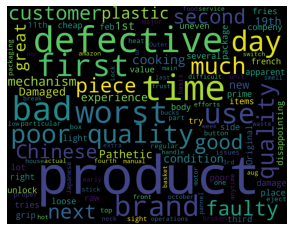

In [119]:
red_neg =' '.join([str(word) for word in matches])
wordcloud_neg = WordCloud(
        background_color = 'black',
        width = 1800,
        height = 1400
        ).generate(red_neg)
plt.imshow(wordcloud_neg)
plt.axis('off');

In [137]:
pattern = [
            {'POS': 'VERB'}, 
            {'POS':'ADP','OP':'?'},
            {'POS': 'NOUN'}
        ]

In [138]:
matches = match(pattern,doc,'pattern')

In [139]:
print(matches)

[using mccain, manufacturing defect, overlooked as box, delivered on evening, took lots, lasting product, lead to unlocking, removing contents, broken handle, Received replacement, made of plastic, given by people, release push, providing stopper, burning smell, assembled price, Built quality, clean food, came today, need replacement, Returned for refund, broken handle, contacting customer, lodged complain, avail warrenty, wasted time, need replacement, need money, facing switch, related issue, fried chicken, get smell, burned mark, contact insalsa, cooking pan/, damaged product, cooked dishes, working offter, take help, cook things, stop button, tried bhindi, damaged product, initiated retun, damaged product, go for philips, u pls, avail warranty, return as product, purchased air, labeled products, cheat customer, raising in consumer, damaged as default, having replacemeny, packed box, see food, disappointed with amazon, take action, give money]


# Postive Reviews

In [103]:
text = pos_reviews[pos_reviews['vader_labels']=='pos']['Reviews'].str.cat(sep=', ')
doc = nlp(text)

In [104]:
def match(pattern, doc, name):
    
    from spacy.matcher import Matcher
    from spacy.attrs import POS
    matcher = Matcher(nlp.vocab)
    if not any(isinstance(p, list) for p in pattern):
        pattern = [pattern]
    matcher.add(name,pattern)
    matches = matcher(doc)
    
    features = []
    for i,start,end in matches:
        features.append(doc[start:end].text)
        
    return features

In [105]:
pattern = [
            {'POS': 'ADJ'}, 
            {'POS': 'NOUN'}
        ]
matches = match(pattern,doc,'pattern')
matches = [word.lower() for word in matches]
print(len(matches))

579


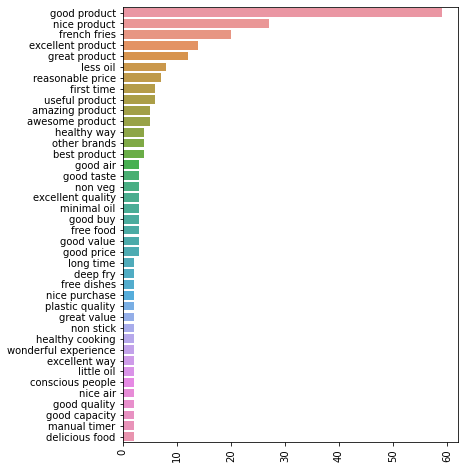

In [106]:
top_words = pd.Series(matches).value_counts()[:40]
plt.figure(figsize=(6,8))
sns.barplot(x=top_words,y=top_words.index)
plt.xticks(rotation=90)
plt.show()

In [107]:
pattern = [
            {'POS': 'VERB'}, 
            {'POS':'ADP','OP':'?'},
            {'POS': 'NOUN'}
        ]
matches = match(pattern,doc,'pattern')
matches = [word.lower() for word in matches]
print(len(matches))

159


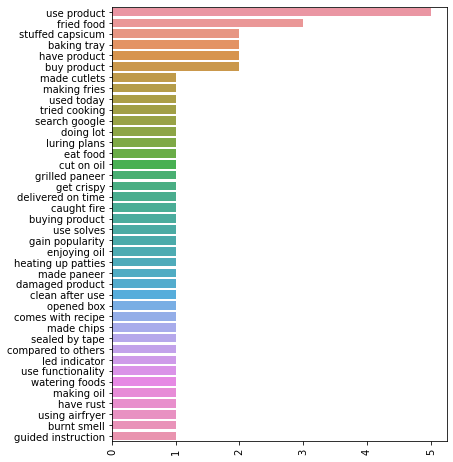

In [108]:
top_words = pd.Series(matches).value_counts()[:40]
plt.figure(figsize=(6,8))
sns.barplot(x=top_words,y=top_words.index)
plt.xticks(rotation=90)
plt.show();

In [109]:
pattern = [
            {'POS': 'ADJ'}
        ]

matches = match(pattern,doc,'pattern')
matches = [word.lower() for word in matches]
print(len(matches))

1236


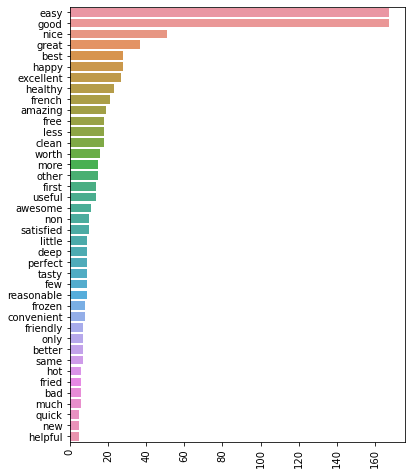

In [110]:
top_words = pd.Series(matches).value_counts()[:40]
plt.figure(figsize=(6,8))
sns.barplot(x=top_words,y=top_words.index)
plt.xticks(rotation=90)
plt.show();